In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [388]:
df = pd.read_csv('Network_anomaly_data.csv')

## Problem Statement: Identify and predict anamolies in network connection. Provide insights and recommendation to minimze the risk.

In [269]:
df.iloc[:, :20]

duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  numfailedlogins  loggedin  numcompromised  \
0                   0       0    0                0         0               0   
1                   0       0    0                0         0               0   
2                   0       0    0                0         0               0   
3                   0       0    0                0         1               0   
4                   0       0    0                0         1               0   
...               ...     ...  ...              ...       ...             ...   
125968              0       0    0                0         0               0   
125969              0       0    0                0         0               0   
125970              0       0    0                0         1               0   
125971              0       0    0                0         0               0   
125972              0       0    0                0         1               0   

        rootshell  suattempted  numroot  numfilecreations  numshells  \
0               0            0        0                 0          0   
1               0            0        0                 0          0   
2               0            0        0                 0          0   
3               0            0        0                 0          0   
4               0            0        0                 0          0   
...           ...          ...      ...               ...        ...   
125968          0            0        0                 0          0   
125969          0            0        0                 0          0   
125970          0            0        0                 0          0   
125971          0            0        0                 0          0   
125972          0            0        0                 0          0   

        numaccessfiles  numoutboundcmds  
0                    0                0  
1                    0                0  
2                    0                0  
3                    0                0  
4                    0                0  
...                ...              ...  
125968               0                0  
125969               0                0  
125970               0                0  
125971               0                0  
125972               0                0  

[125973 rows x 20 columns]

In [270]:
df.iloc[:, 19:37]

numoutboundcmds  ishostlogin  isguestlogin  count  srvcount  \
0                     0            0             0      2         2   
1                     0            0             0     13         1   
2                     0            0             0    123         6   
3                     0            0             0      5         5   
4                     0            0             0     30        32   
...                 ...          ...           ...    ...       ...   
125968                0            0             0    184        25   
125969                0            0             0      2         2   
125970                0            0             0      1         1   
125971                0            0             0    144         8   
125972                0            0             0      1         1   

        serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  samesrvrate  \
0              0.0            0.0         0.0            0.0         1.00   
1              0.0            0.0         0.0            0.0         0.08   
2              1.0            1.0         0.0            0.0         0.05   
3              0.2            0.2         0.0            0.0         1.00   
4              0.0            0.0         0.0            0.0         1.00   
...            ...            ...         ...            ...          ...   
125968         1.0            1.0         0.0            0.0         0.14   
125969         0.0            0.0         0.0            0.0         1.00   
125970         0.0            0.0         0.0            0.0         1.00   
125971         1.0            1.0         0.0            0.0         0.06   
125972         0.0            0.0         0.0            0.0         1.00   

        diffsrvrate  srvdiffhostrate  dsthostcount  dsthostsrvcount  \
0              0.00             0.00           150               25   
1              0.15             0.00           255                1   
2              0.07             0.00           255               26   
3              0.00             0.00            30              255   
4              0.00             0.09           255              255   
...             ...              ...           ...              ...   
125968         0.06             0.00           255               25   
125969         0.00             0.00           255              244   
125970         0.00             0.00           255               30   
125971         0.05             0.00           255                8   
125972         0.00             0.00           255               77   

        dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
0                     0.17                0.03                    0.17   
1                     0.00                0.60                    0.88   
2                     0.10                0.05                    0.00   
3                     1.00                0.00                    0.03   
4                     1.00                0.00                    0.00   
...                    ...                 ...                     ...   
125968                0.10                0.06                    0.00   
125969                0.96                0.01                    0.01   
125970                0.12                0.06                    0.00   
125971                0.03                0.05                    0.00   
125972                0.30                0.03                    0.30   

        dsthostsrvdiffhostrate  
0                         0.00  
1                         0.00  
2                         0.00  
3                         0.04  
4                         0.00  
...                        ...  
125968                    0.00  
125969                    0.00  
125970                    0.00  
125971                    0.00  
125972                    0.00  

[125973 rows x 18 columns]

In [271]:
df.iloc[:, 36:]

dsthostsrvdiffhostrate  dsthostserrorrate  dsthostsrvserrorrate  \
0                         0.00               0.00                  0.00   
1                         0.00               0.00                  0.00   
2                         0.00               1.00                  1.00   
3                         0.04               0.03                  0.01   
4                         0.00               0.00                  0.00   
...                        ...                ...                   ...   
125968                    0.00               1.00                  1.00   
125969                    0.00               0.00                  0.00   
125970                    0.00               0.72                  0.00   
125971                    0.00               1.00                  1.00   
125972                    0.00               0.00                  0.00   

        dsthostrerrorrate  dsthostsrvrerrorrate   attack  lastflag  
0                    0.05                  0.00   normal        20  
1                    0.00                  0.00   normal        15  
2                    0.00                  0.00  neptune        19  
3                    0.00                  0.01   normal        21  
4                    0.00                  0.00   normal        21  
...                   ...                   ...      ...       ...  
125968               0.00                  0.00  neptune        20  
125969               0.00                  0.00   normal        21  
125970               0.01                  0.00   normal        18  
125971               0.00                  0.00  neptune        20  
125972               0.00                  0.00   normal        21  

[125973 rows x 7 columns]

## EDA

In [272]:
df['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [273]:
df['attack?'] = np.where(df['attack']=="normal",0,1)

In [274]:
df['attack?']

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: attack?, Length: 125973, dtype: int64

In [275]:
df['attack?'].value_counts()
## We see that minority class is not too small as compared to the majority class

attack?
0    67343
1    58630
Name: count, dtype: int64

In [276]:
df['protocoltype'].value_counts()

protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [277]:
df['flag'].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [278]:
df['service'].value_counts()

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [280]:
df.shape

(125973, 44)

In [281]:
df.describe()

duration      srcbytes      dstbytes           land  wrongfragment  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198       0.022687   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086       0.253530   
min         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000       3.000000   

              urgent            hot  numfailedlogins       loggedin  \
count  125973.000000  125973.000000    125973.000000  125973.000000   
mean        0.000111       0.204409         0.001222       0.395736   
std         0.014366       2.149968         0.045239       0.489010   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         0.000000       0.000000   
50%         0.000000       0.000000         0.000000       0.000000   
75%         0.000000       0.000000         0.000000       1.000000   
max         3.000000      77.000000         5.000000       1.000000   

       numcompromised  ...  dsthostsamesrvrate  dsthostdiffsrvrate  \
count   125973.000000  ...       125973.000000       125973.000000   
mean         0.279250  ...            0.521242            0.082951   
std         23.942042  ...            0.448949            0.188922   
min          0.000000  ...            0.000000            0.000000   
25%          0.000000  ...            0.050000            0.000000   
50%          0.000000  ...            0.510000            0.020000   
75%          0.000000  ...            1.000000            0.070000   
max       7479.000000  ...            1.000000            1.000000   

       dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
count           125973.000000           125973.000000      125973.000000   
mean                 0.148379                0.032542           0.284452   
std                  0.308997                0.112564           0.444784   
min                  0.000000                0.000000           0.000000   
25%                  0.000000                0.000000           0.000000   
50%                  0.000000                0.000000           0.000000   
75%                  0.060000                0.020000           1.000000   
max                  1.000000                1.000000           1.000000   

       dsthostsrvserrorrate  dsthostrerrorrate  dsthostsrvrerrorrate  \
count         125973.000000      125973.000000         125973.000000   
mean               0.278485           0.118832              0.120240   
std                0.445669           0.306557              0.319459   
min                0.000000           0.000000              0.000000   
25%                0.000000           0.000000              0.000000   
50%                0.000000           0.000000              0.000000   
75%                1.000000           0.000000              0.000000   
max                1.000000           1.000000              1.000000   

            lastflag        attack?  
count  125973.000000  125973.000000  
mean       19.504060       0.465417  
std         2.291503       0.498805  
min         0.000000       0.000000  
25%        18.000000       0.000000  
50%        20.000000       0.000000  
75%        21.000000       1.000000  
max        21.000000       1.000000  

[8 rows x 40 columns]

In [282]:
df['wrongfragment'].value_counts()

wrongfragment
0    124883
3       884
1       206
Name: count, dtype: int64

## Univariate Analysis: Distribution of each variable

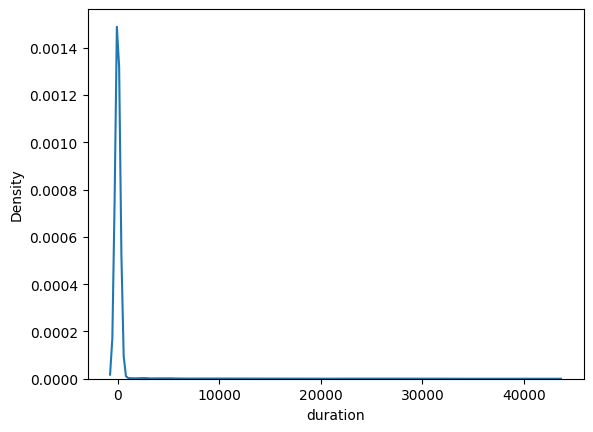

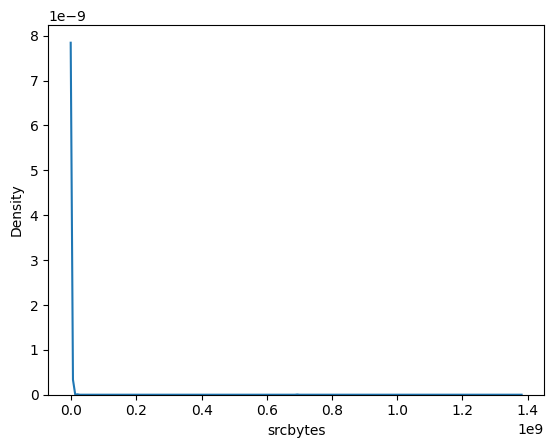

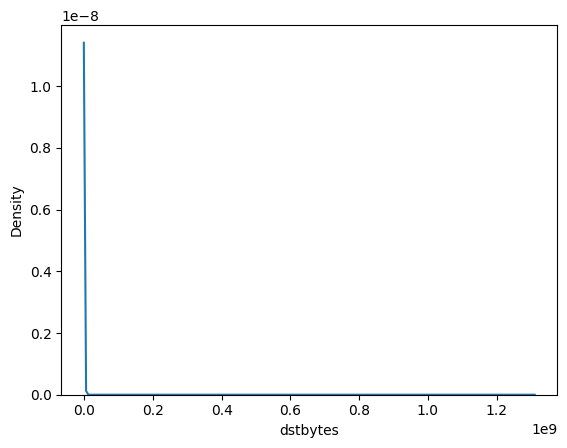

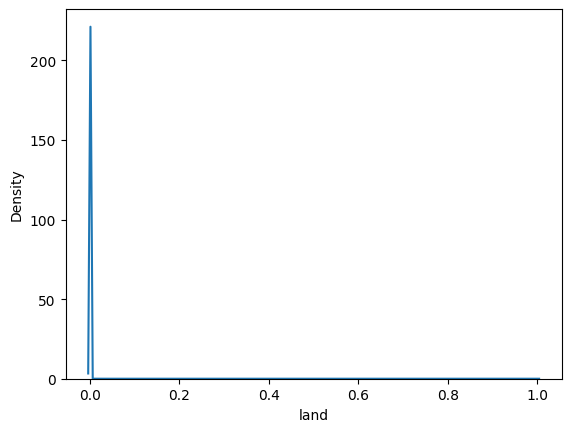

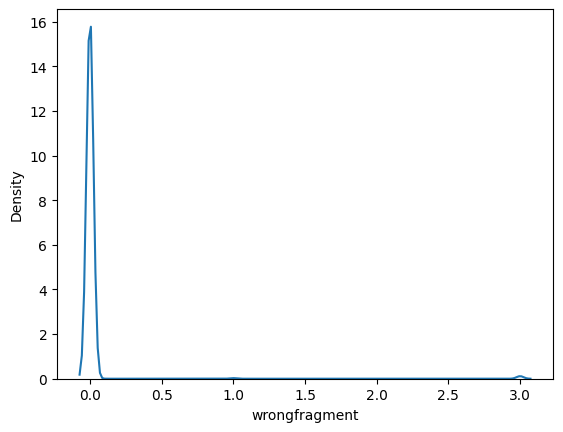

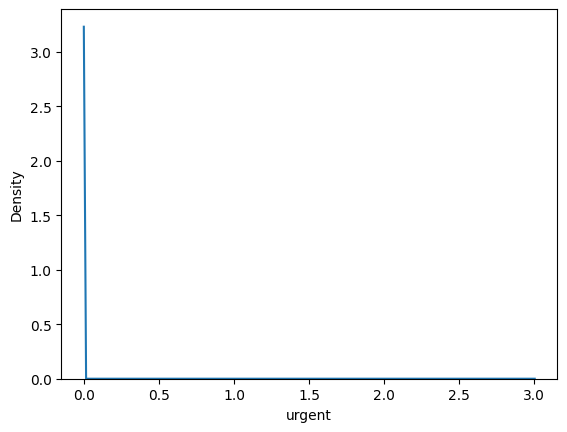

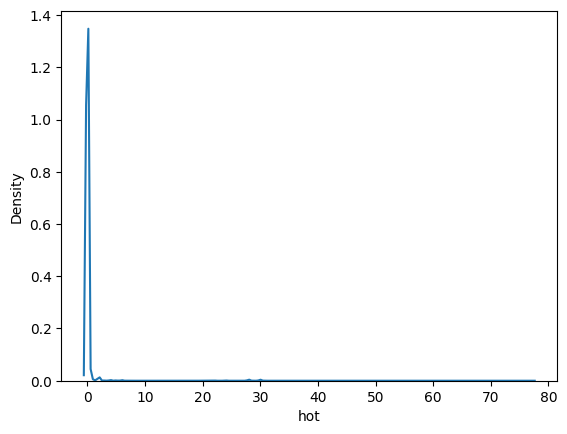

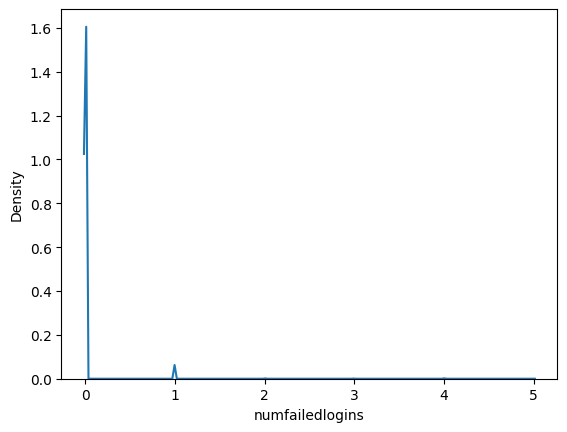

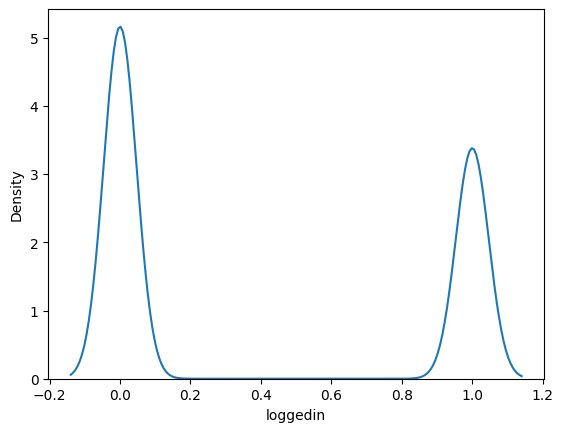

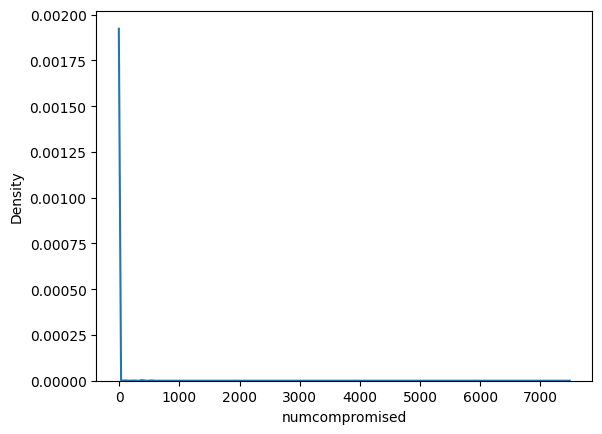

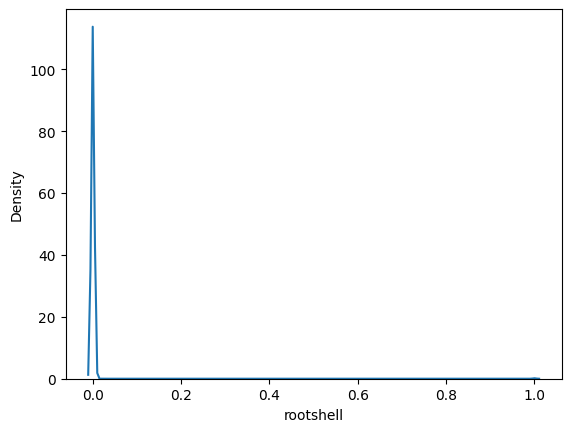

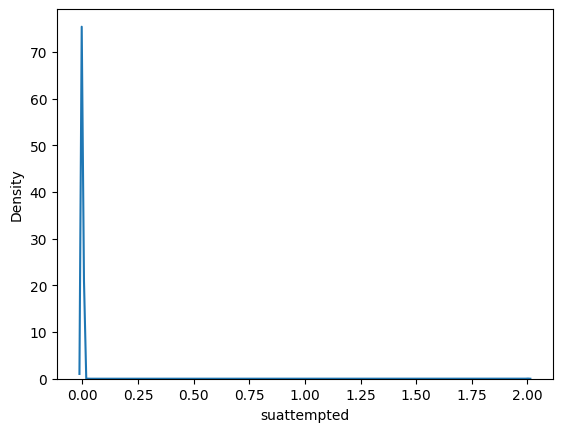

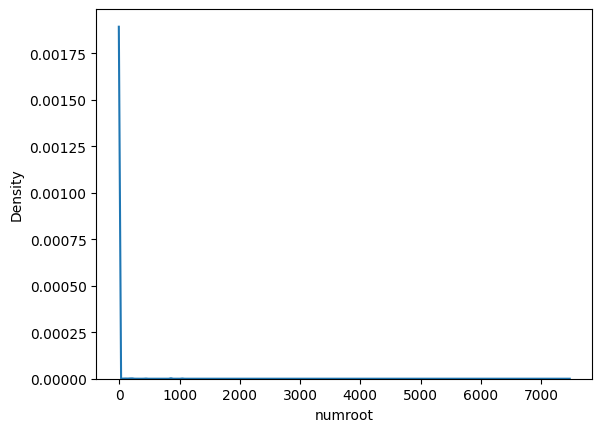

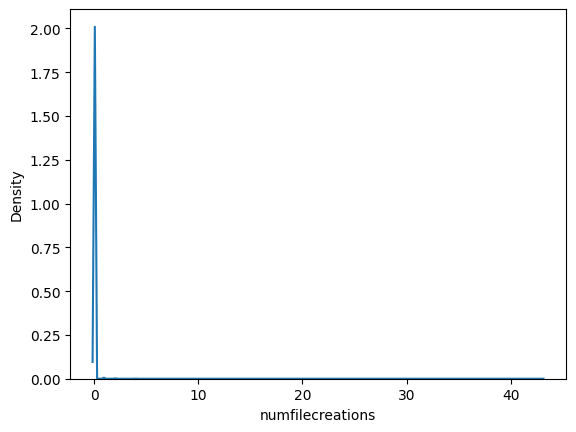

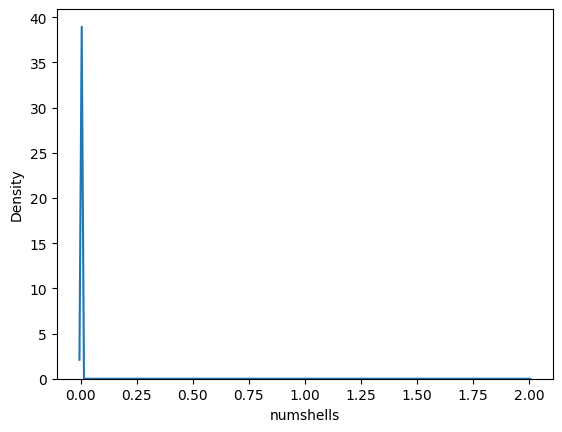

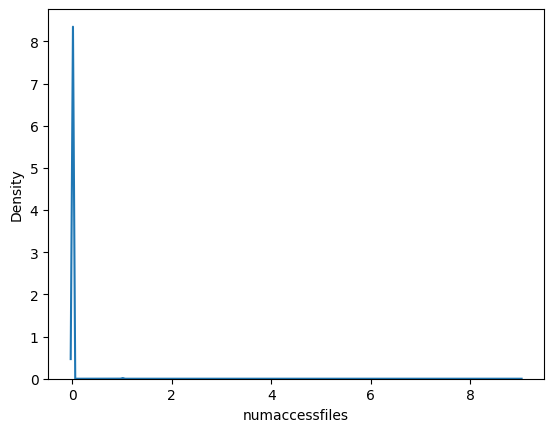

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_29102/610532889.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


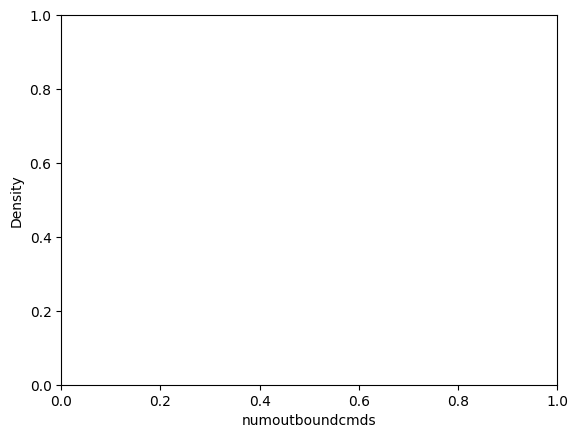

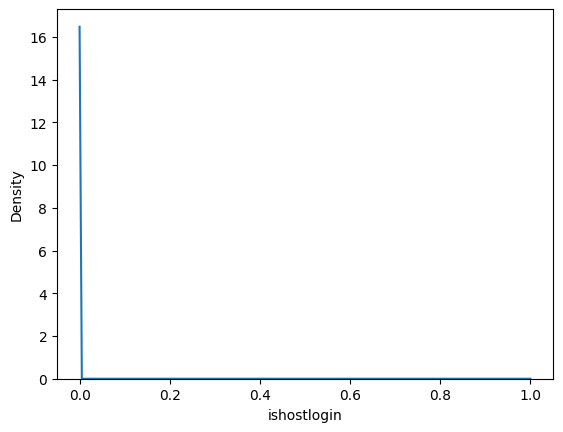

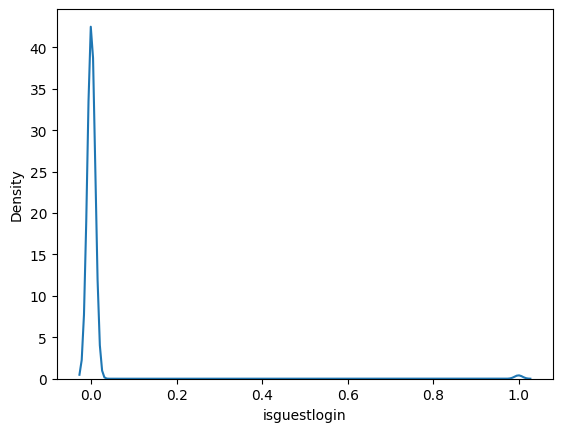

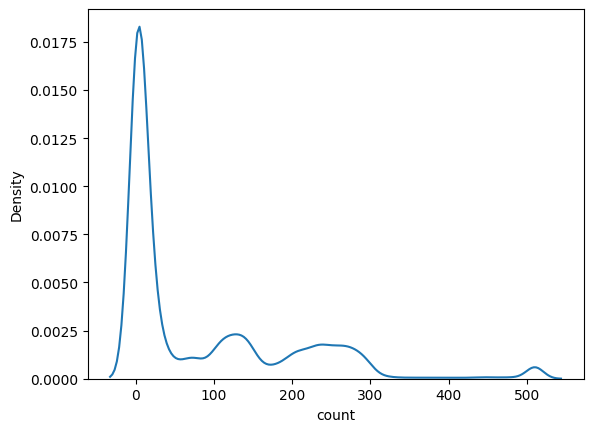

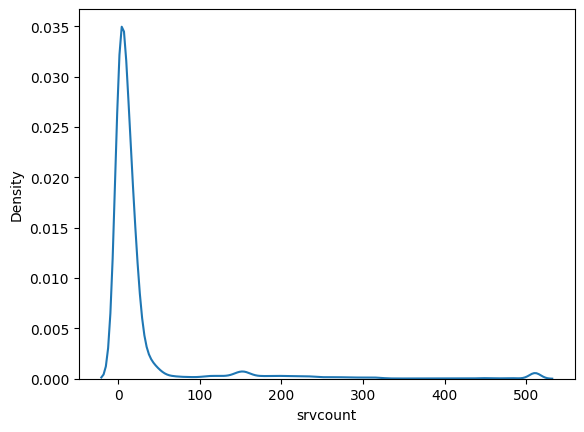

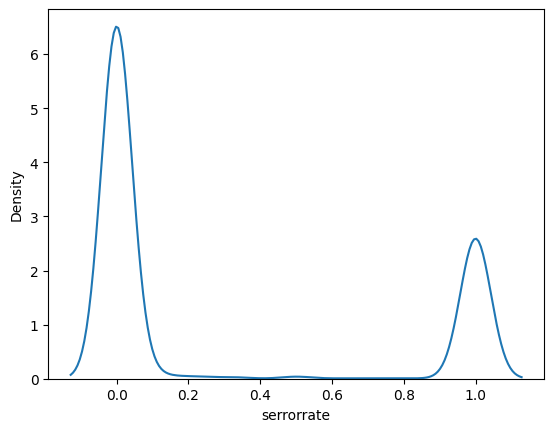

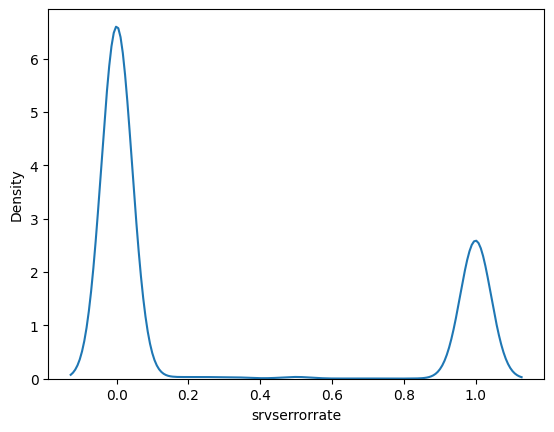

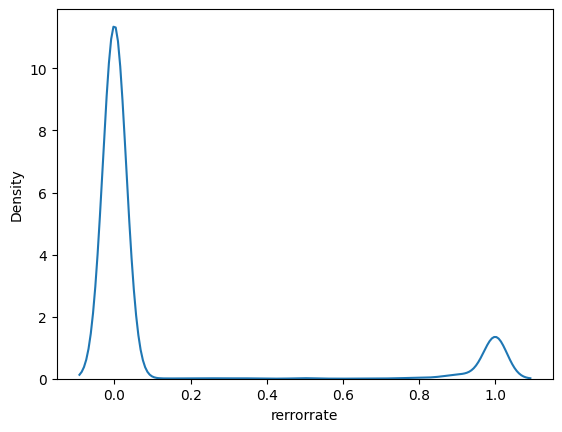

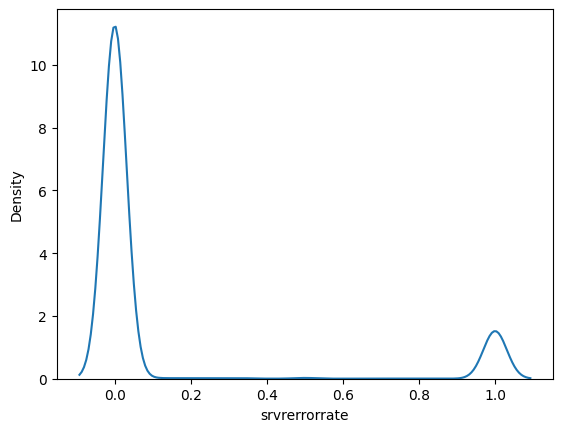

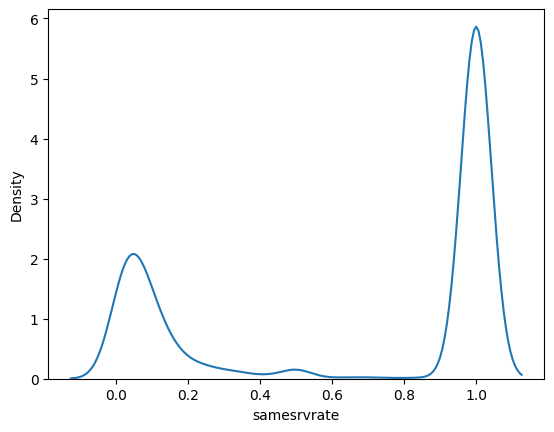

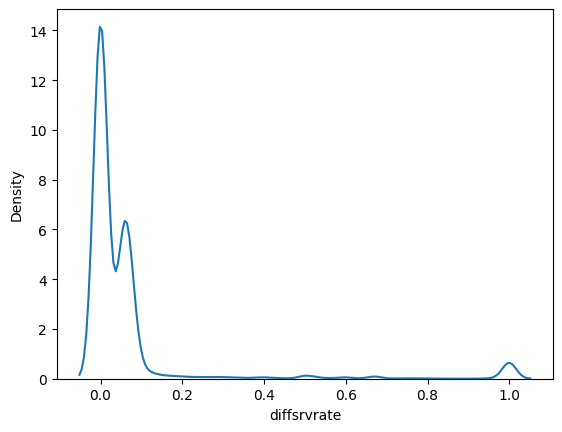

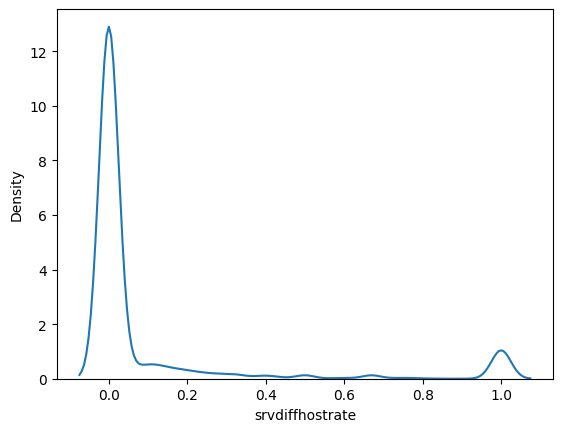

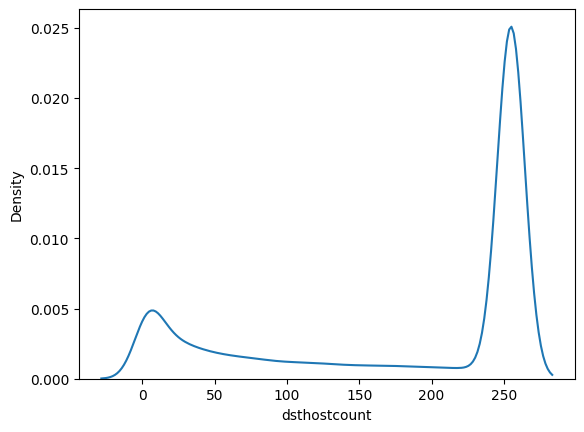

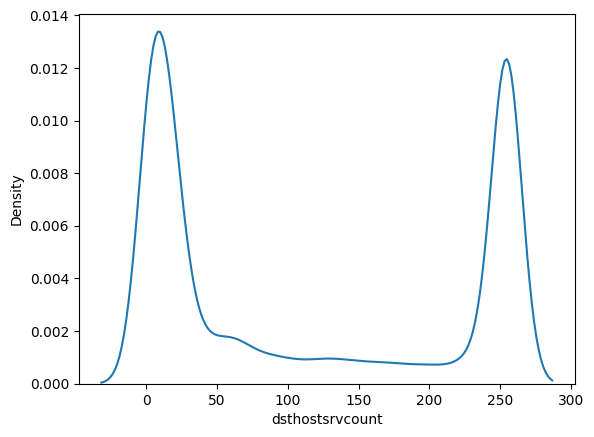

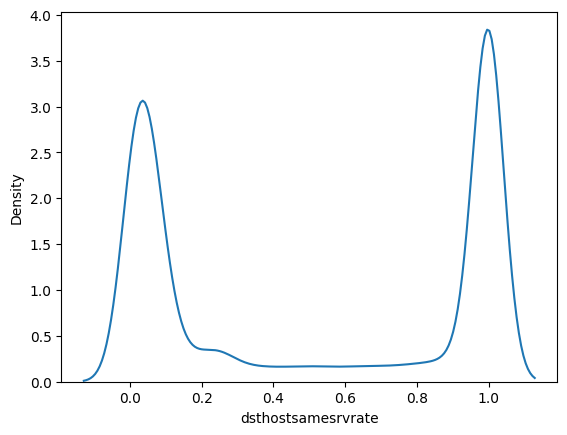

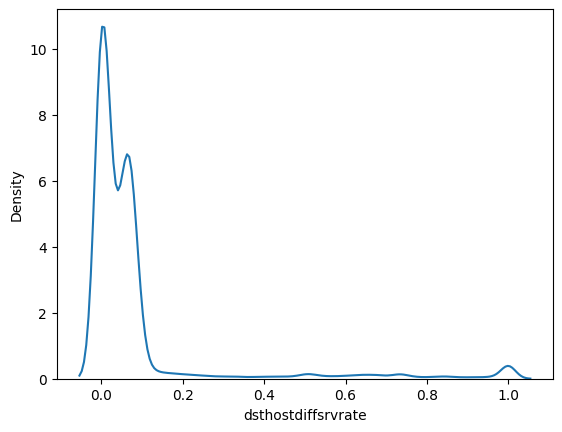

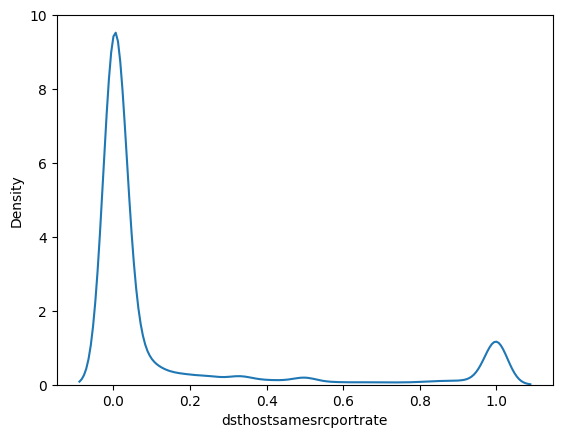

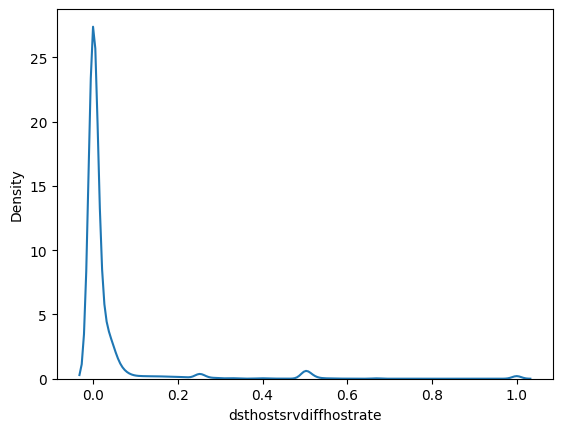

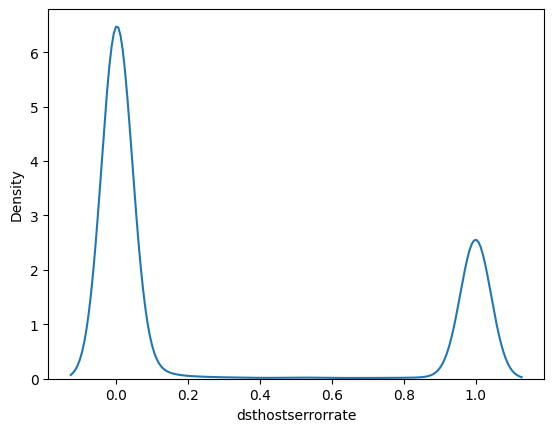

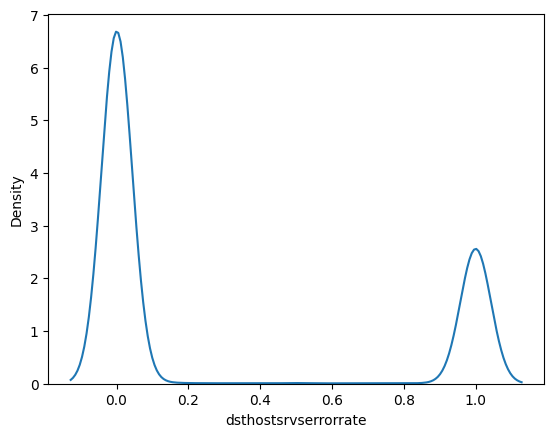

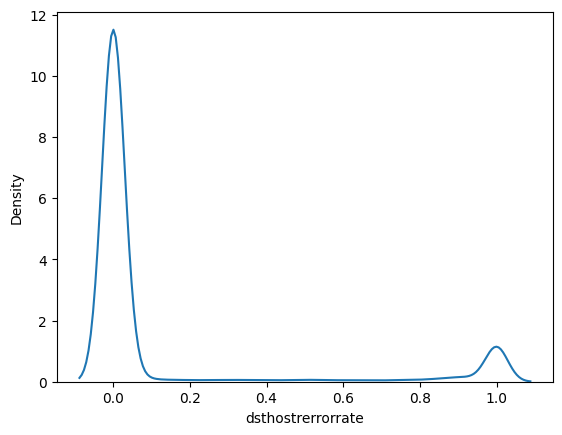

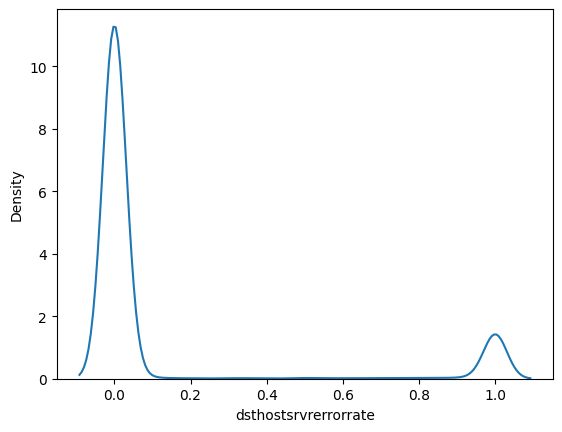

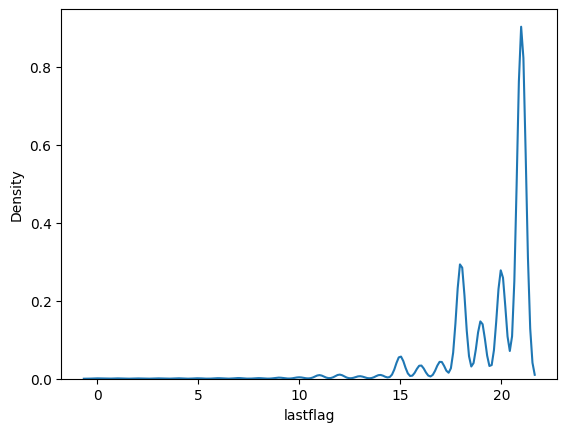

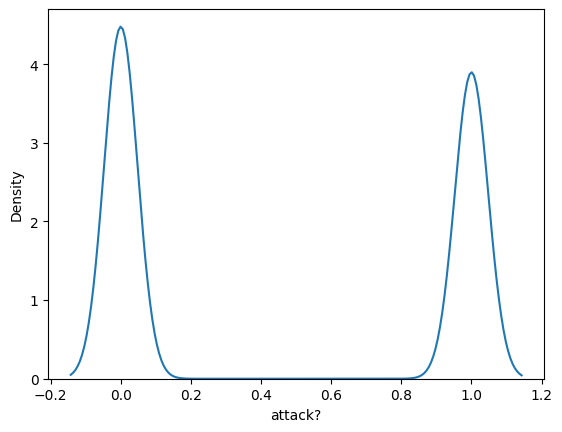

In [283]:
for col in df.describe().columns:
    sns.kdeplot(df[col])
    plt.show()

## We see that most of the plots are very much skewed because of outliers

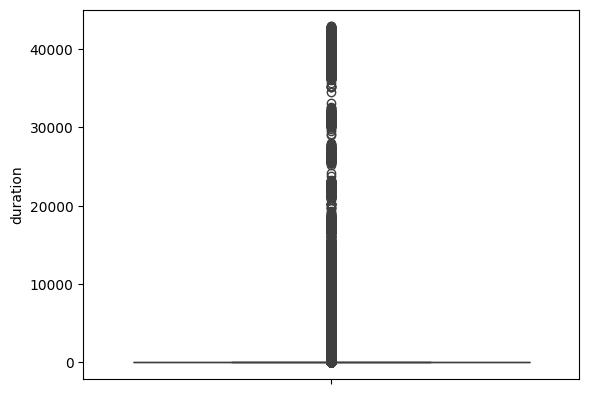

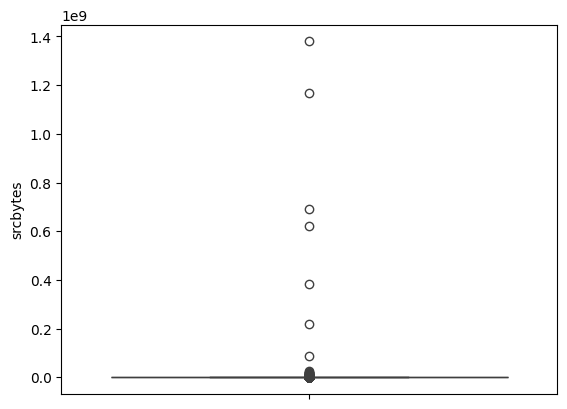

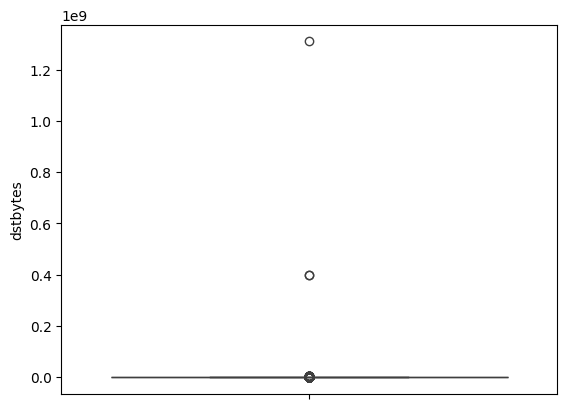

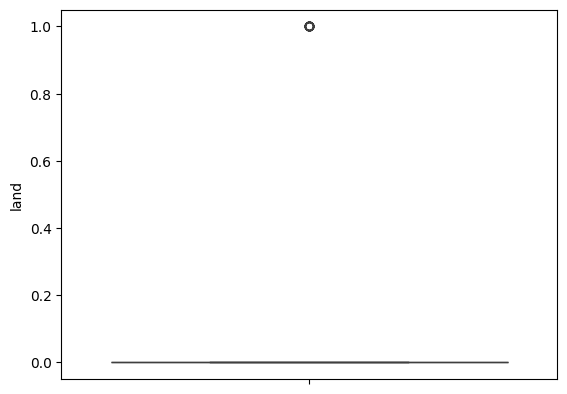

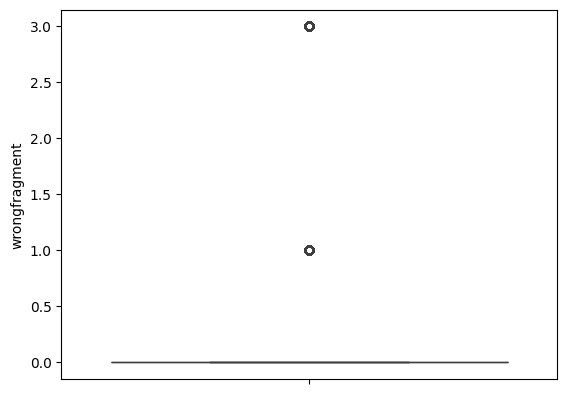

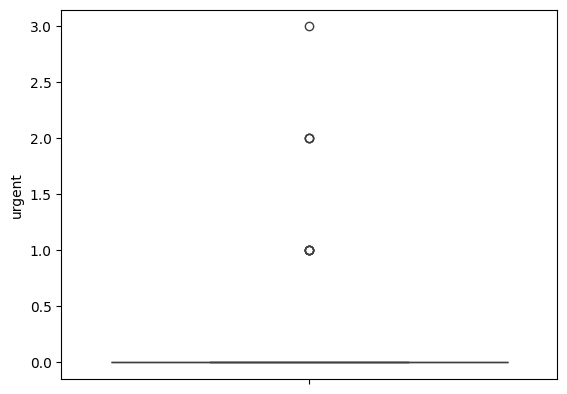

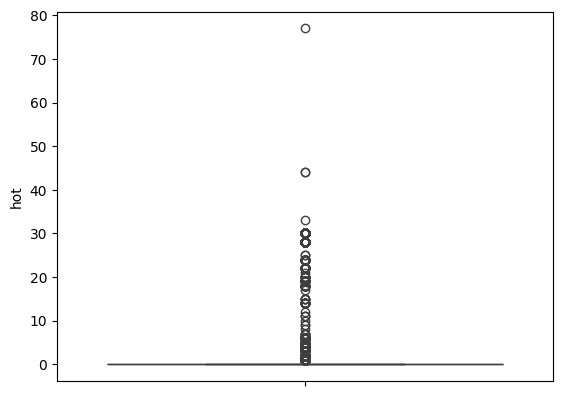

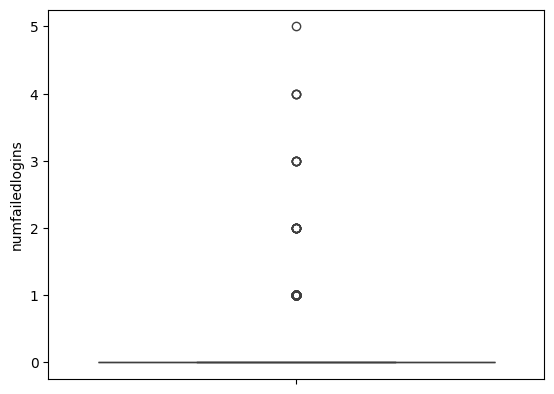

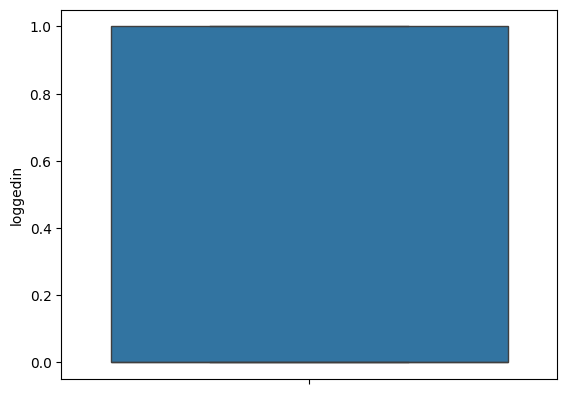

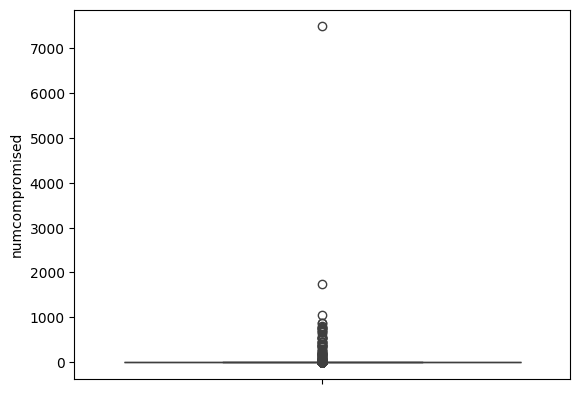

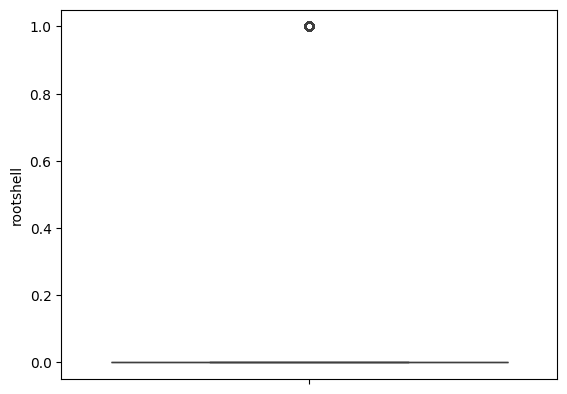

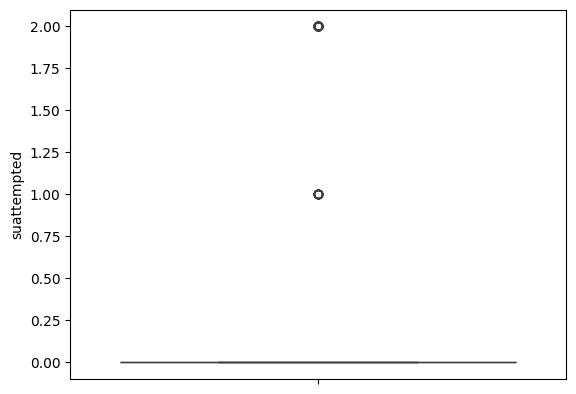

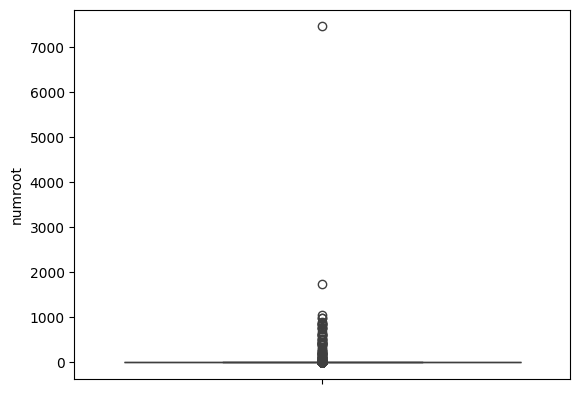

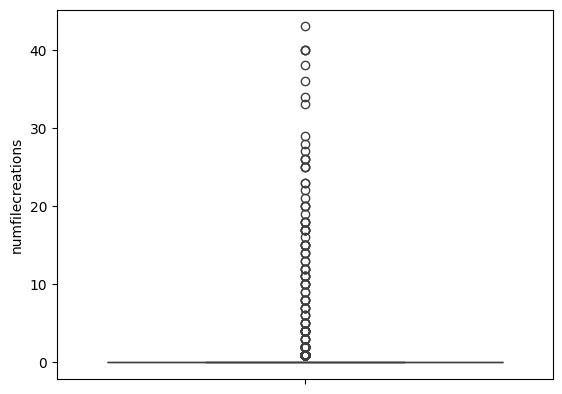

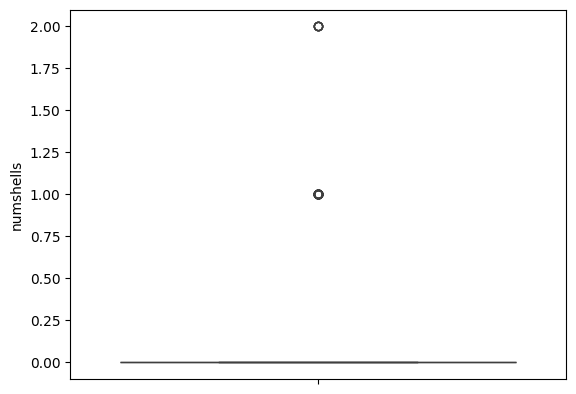

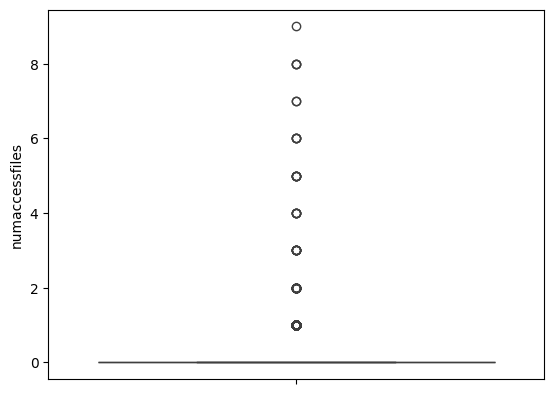

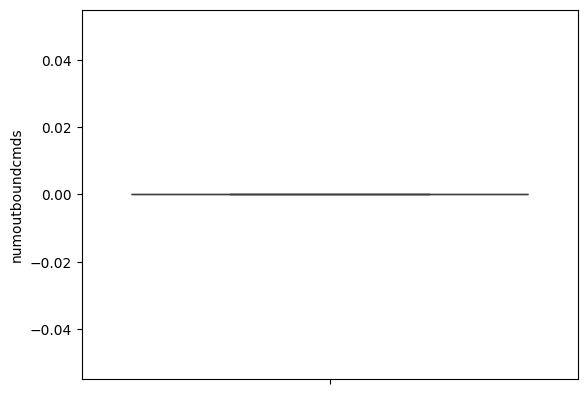

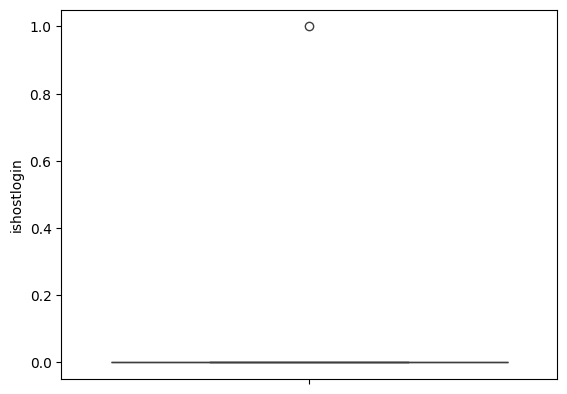

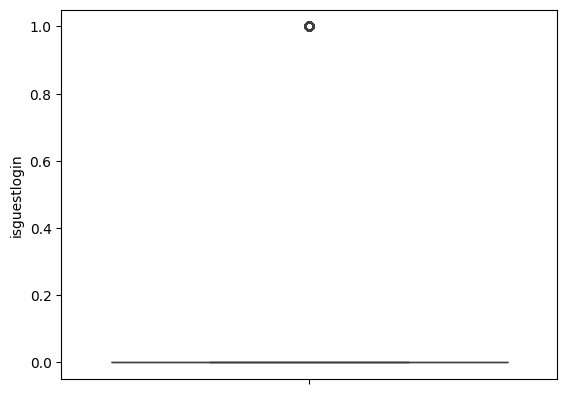

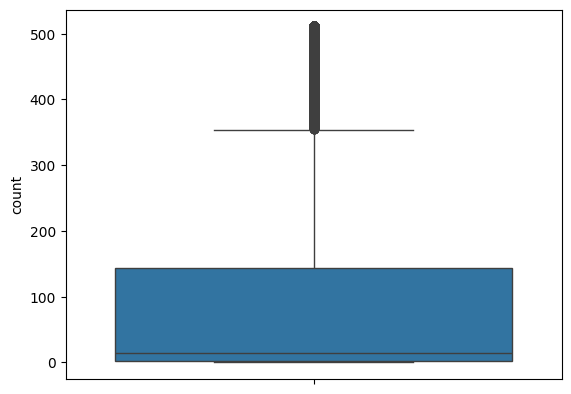

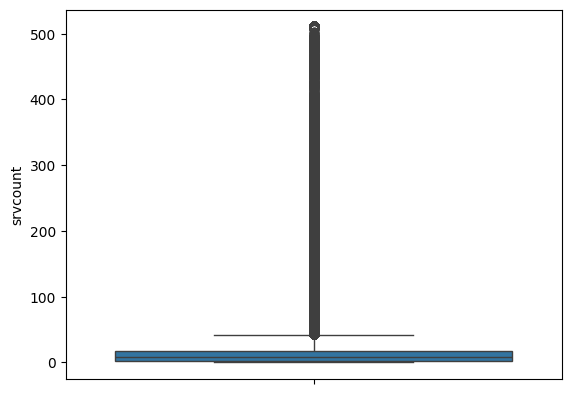

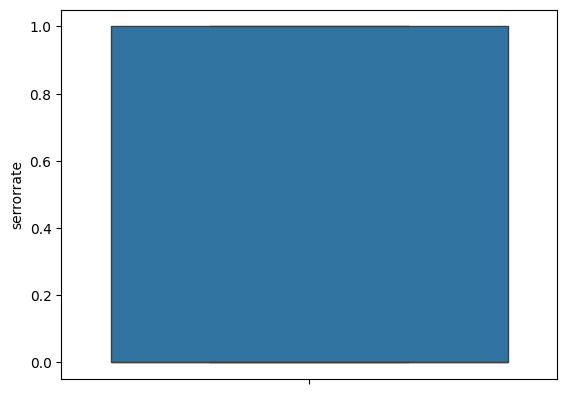

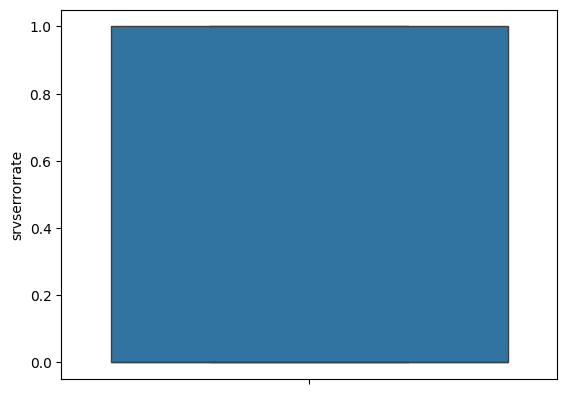

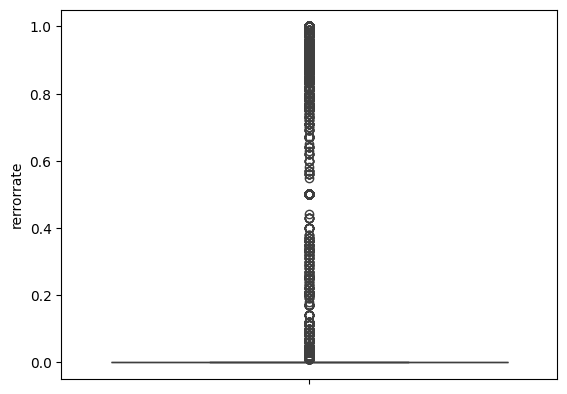

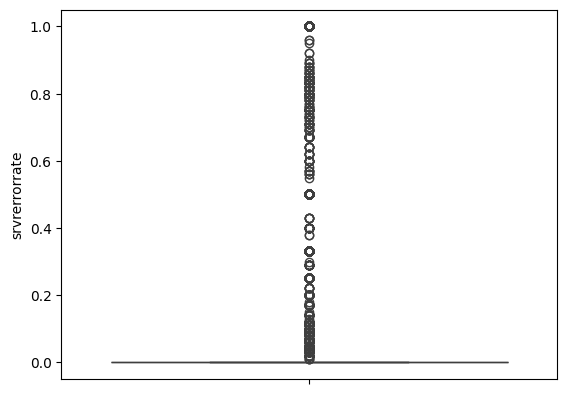

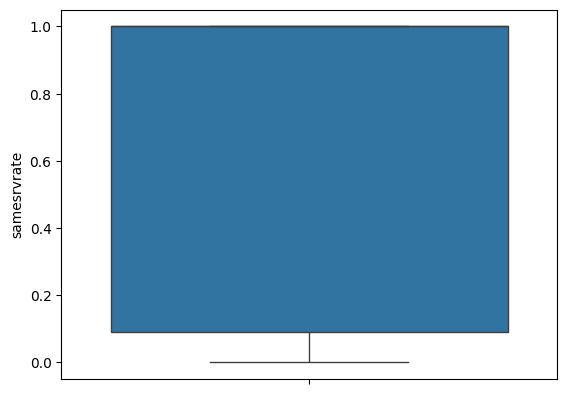

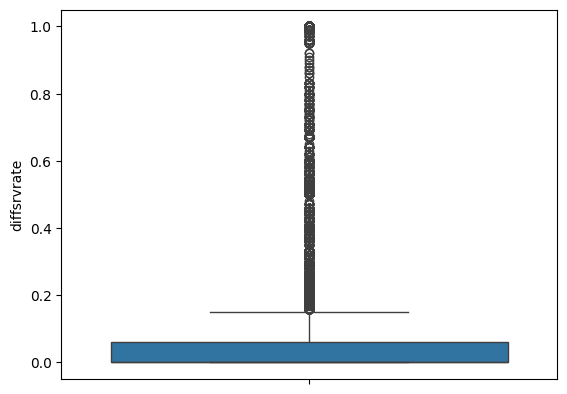

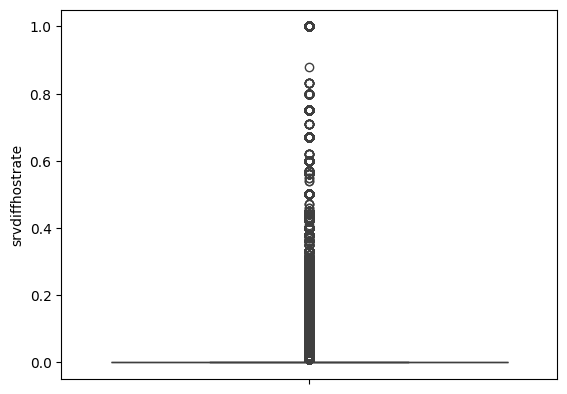

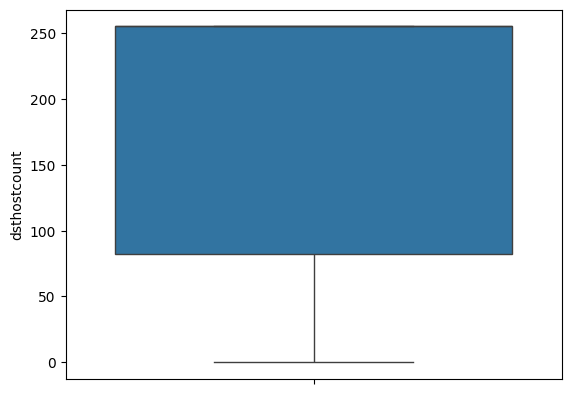

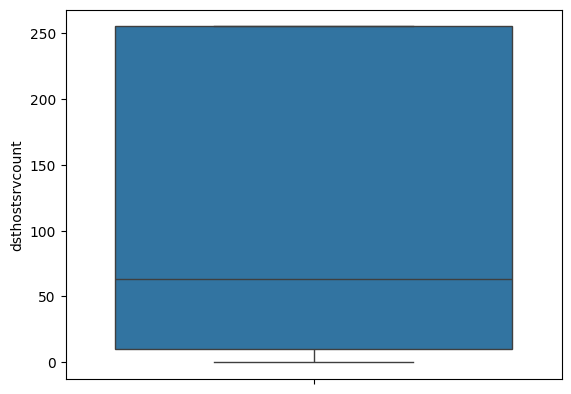

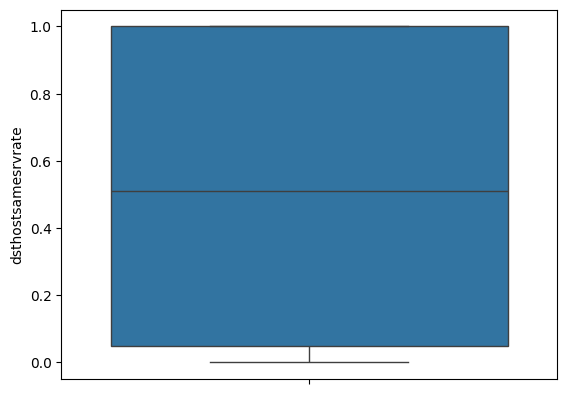

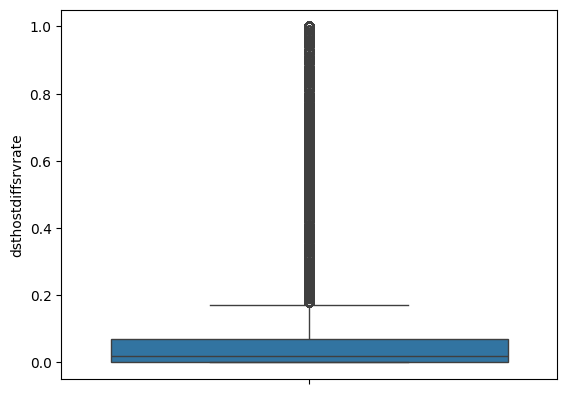

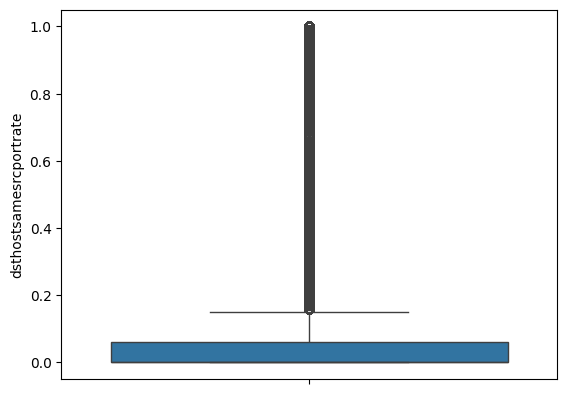

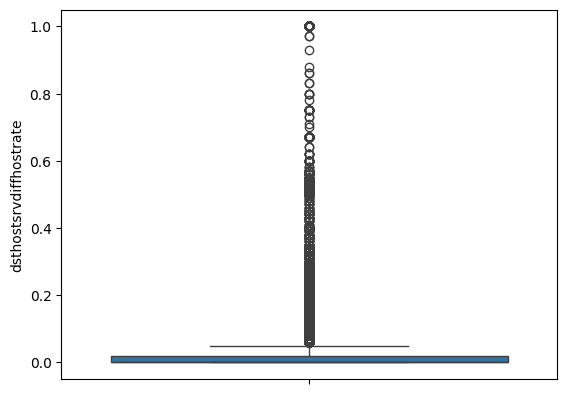

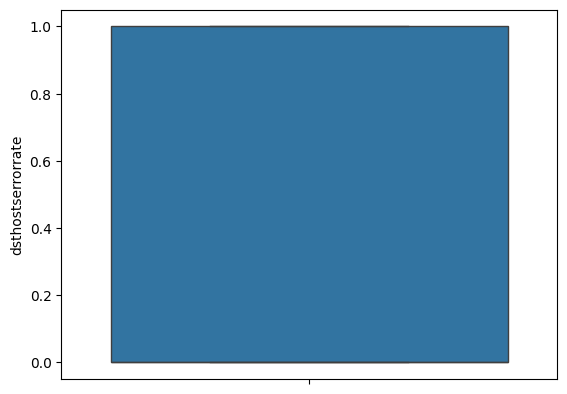

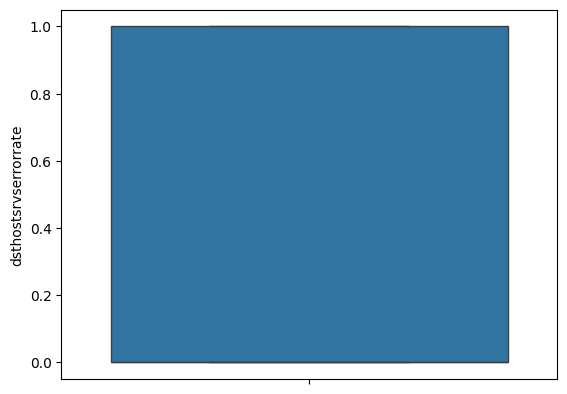

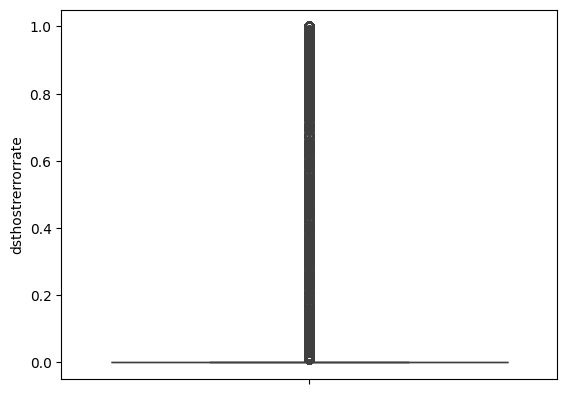

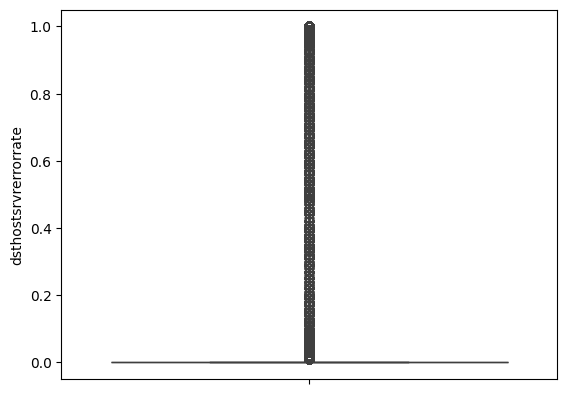

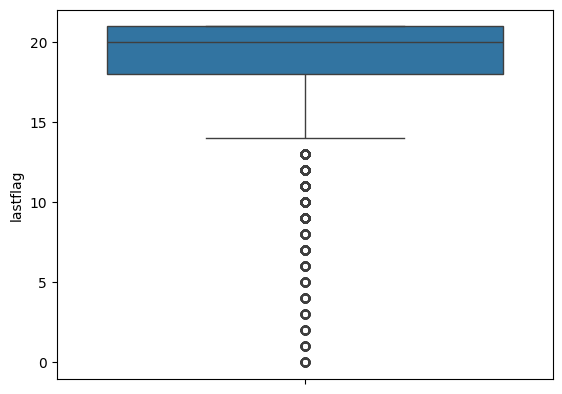

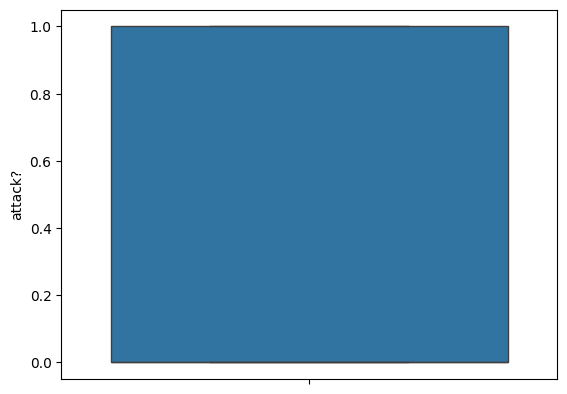

In [284]:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

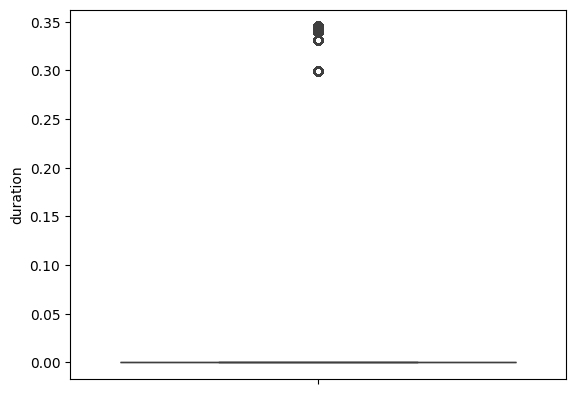

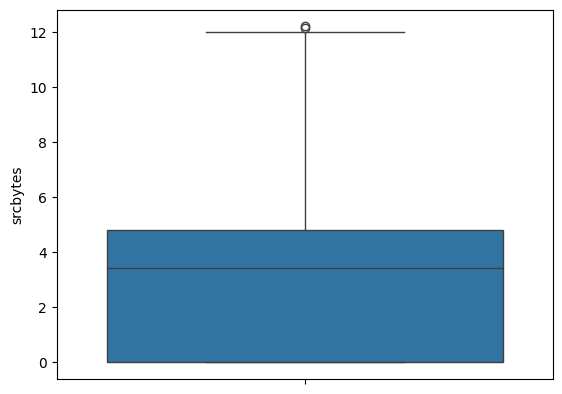

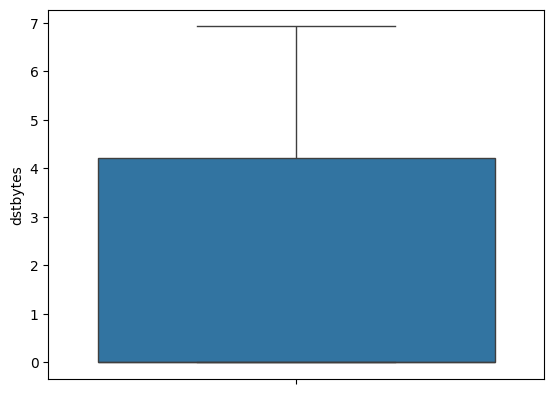

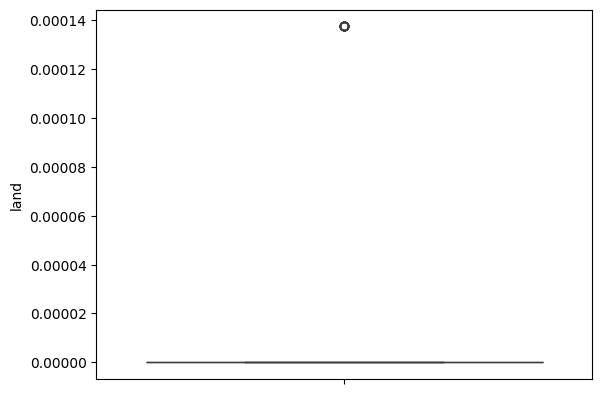

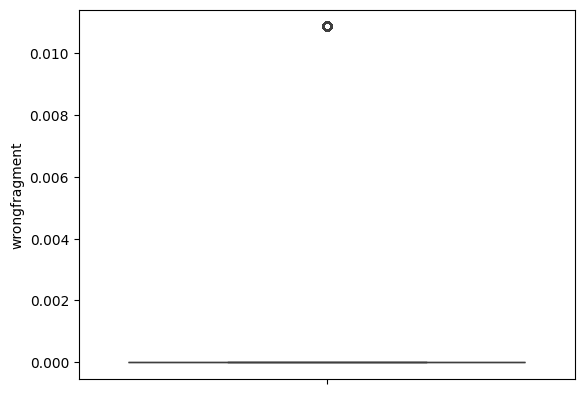

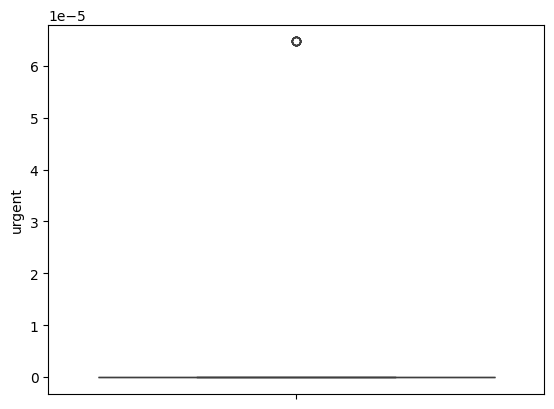

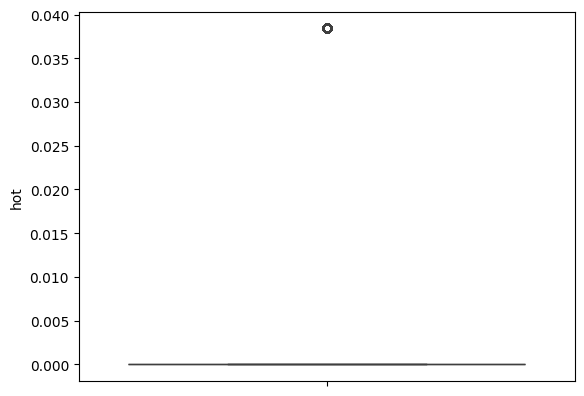

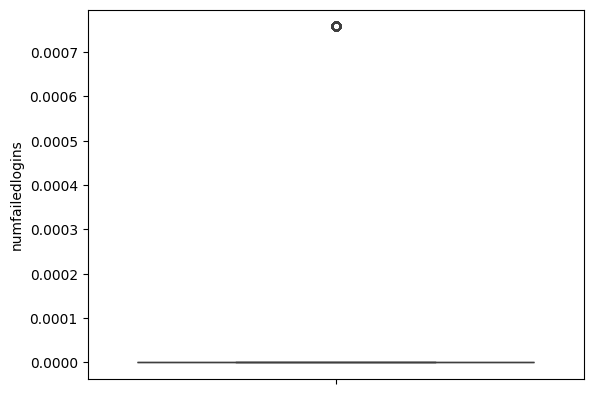

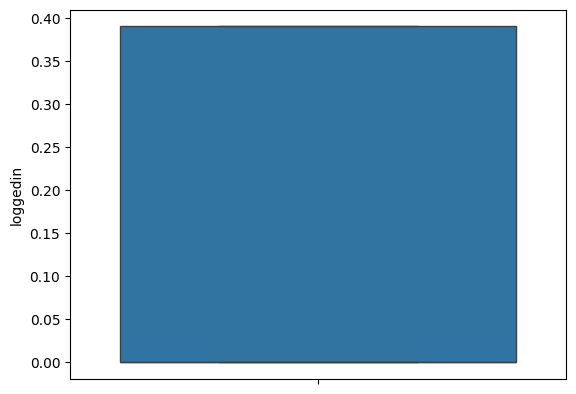

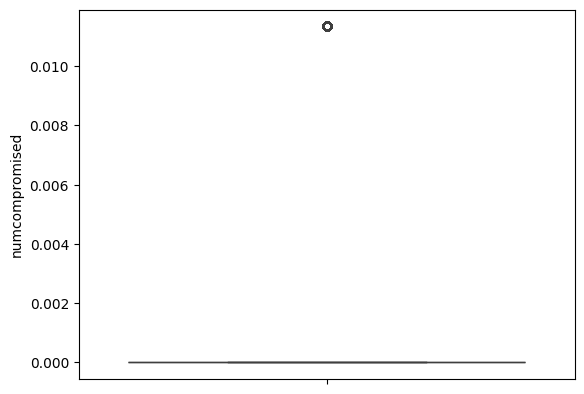

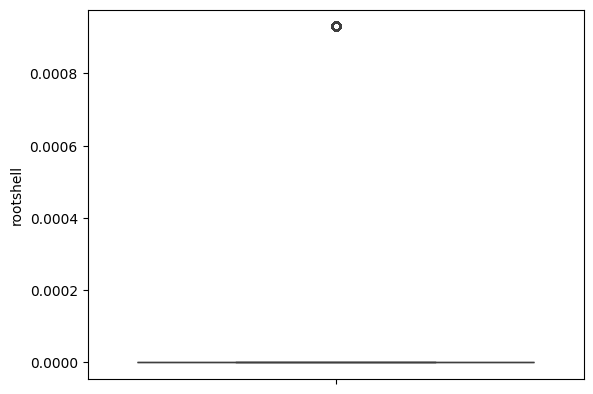

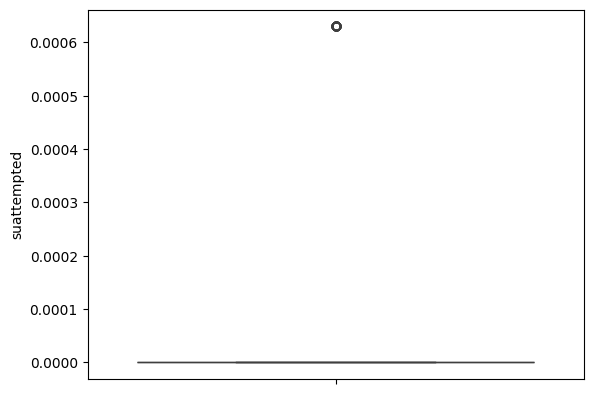

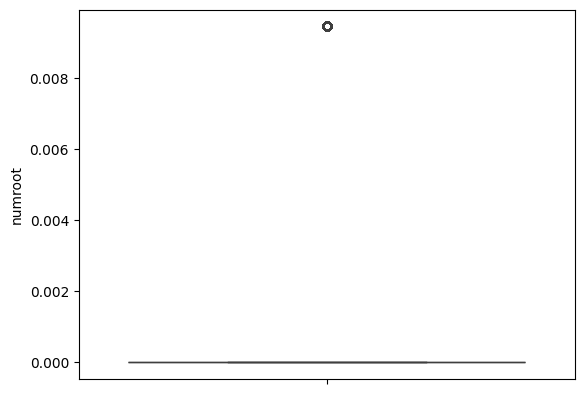

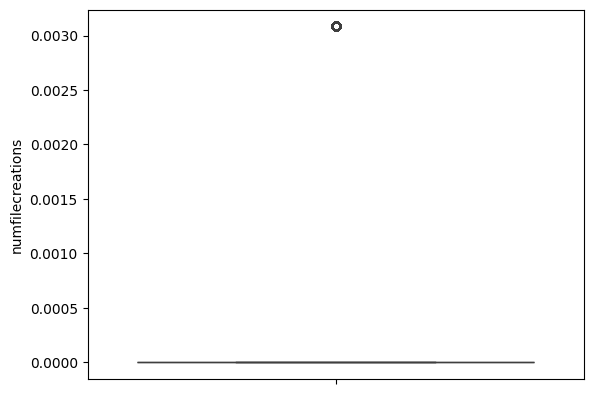

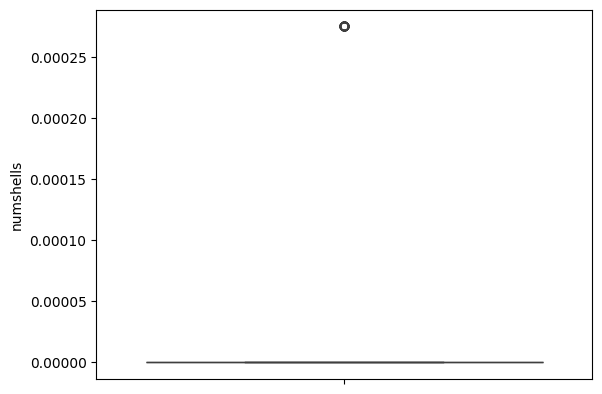

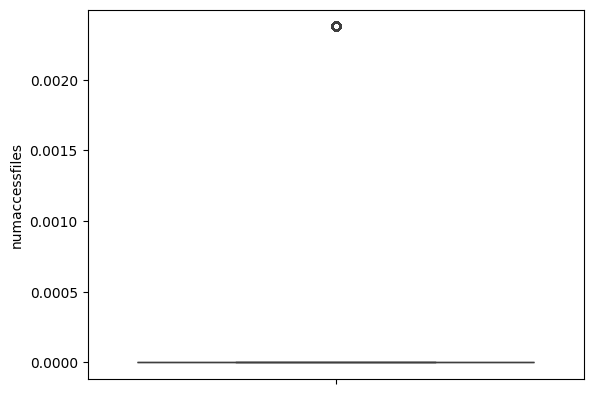

ValueError: Data must not be constant.

In [285]:
## Let us try and transform the data so that the outliers will be nullified and their impact will be reduced
from scipy.stats import boxcox
transformed_data = pd.DataFrame()
for column in df.describe().columns:
    a = df[column] - df[column].min() +1 
    transformed_data[column], fitted_lambda = boxcox(a)
    sns.boxplot(transformed_data[column])
    plt.show()

<Axes: >

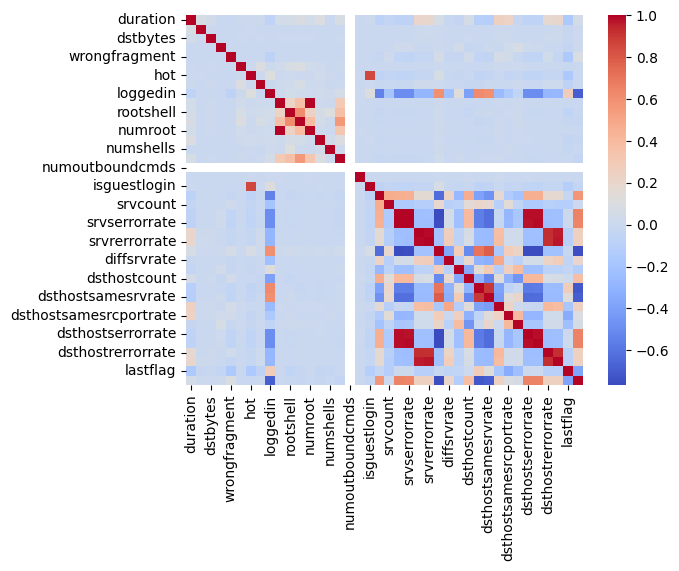

In [286]:
## Heatmap showing correlation between each column
numeric_col = df.describe().columns
sns.heatmap(df[numeric_col].corr(), cmap = 'coolwarm')

In [287]:
cor = df[numeric_col].corr()
cor

duration  srcbytes  dstbytes      land  wrongfragment  \
duration                1.000000  0.070737  0.034878 -0.001553      -0.009866   
srcbytes                0.070737  1.000000  0.000204 -0.000109      -0.000693   
dstbytes                0.034878  0.000204  1.000000 -0.000069      -0.000440   
land                   -0.001553 -0.000109 -0.000069  1.000000      -0.001261   
wrongfragment          -0.009866 -0.000693 -0.000440 -0.001261       1.000000   
urgent                  0.003830 -0.000059  0.000248 -0.000109      -0.000692   
hot                     0.000705  0.000295 -0.000344 -0.001340      -0.008508   
numfailedlogins         0.009528 -0.000208  0.000504 -0.000381      -0.002418   
loggedin               -0.064218 -0.003353 -0.002894 -0.011402      -0.072418   
numcompromised          0.042679 -0.000086  0.001233 -0.000164      -0.001044   
rootshell               0.052791 -0.000272  0.001069 -0.000516      -0.003280   
suattempted             0.087183 -0.000186  0.001133 -0.000344      -0.002187   
numroot                 0.045519 -0.000093  0.001229 -0.000174      -0.001108   
numfilecreations        0.099116 -0.000179  0.000089 -0.000369      -0.002343   
numshells              -0.001593 -0.000134 -0.000083 -0.000262      -0.001665   
numaccessfiles          0.070420 -0.000309  0.000339 -0.000581      -0.003689   
numoutboundcmds              NaN       NaN       NaN       NaN            NaN   
ishostlogin            -0.000258 -0.000022 -0.000008 -0.000040      -0.000252   
isguestlogin            0.000440 -0.000742 -0.000421 -0.001374      -0.008728   
count                  -0.079042 -0.005152 -0.003543 -0.009837      -0.020819   
srvcount               -0.039470 -0.002792 -0.001754 -0.005031       0.024457   
serrorrate             -0.069873 -0.003228 -0.003059  0.021734      -0.043316   
srvserrorrate          -0.069510 -0.003438 -0.003038  0.022614      -0.056549   
rerrorrate              0.200682  0.013782  0.011176 -0.004096      -0.033052   
srvrerrorrate           0.199961  0.013975  0.011052 -0.005275      -0.033507   
samesrvrate             0.074681  0.003899  0.003788  0.008739       0.054759   
diffsrvrate            -0.013738 -0.000432 -0.001703 -0.001551      -0.026638   
srvdiffhostrate        -0.040158 -0.002608 -0.001674  0.038102      -0.026247   
dsthostcount            0.050570 -0.005791  0.002528 -0.025499       0.041056   
dsthostsrvcount        -0.109776 -0.006861 -0.004224 -0.014159      -0.045240   
dsthostsamesrvrate     -0.116005 -0.006572 -0.004424  0.011597      -0.048733   
dsthostdiffsrvrate      0.254195  0.000900  0.011031 -0.004516       0.059797   
dsthostsamesrcportrate  0.228737  0.000431  0.011747  0.033851       0.037177   
dsthostsrvdiffhostrate -0.026669 -0.001655 -0.001281  0.070474      -0.016252   
dsthostserrorrate      -0.064948 -0.004503 -0.003024  0.019840      -0.051917   
dsthostsrvserrorrate   -0.064361 -0.003397 -0.002944  0.012276      -0.055917   
dsthostrerrorrate       0.173815 -0.001468  0.011729 -0.005222       0.028890   
dsthostsrvrerrorrate    0.199024  0.012449  0.011223 -0.005303      -0.033682   
lastflag               -0.156311 -0.022592 -0.018076 -0.037038      -0.157130   
attack?                 0.048785  0.005921  0.004118  0.007191       0.095905   

                          urgent       hot  numfailedlogins  loggedin  \
duration                0.003830  0.000705         0.009528 -0.064218   
srcbytes               -0.000059  0.000295        -0.000208 -0.003353   
dstbytes                0.000248 -0.000344         0.000504 -0.002894   
land                   -0.000109 -0.001340        -0.000381 -0.011402   
wrongfragment          -0.000692 -0.008508        -0.002418 -0.072418   
urgent                  1.000000  0.000293         0.097507  0.007299   
hot                     0.000293  1.000000         0.003715  0.116435   
numfailedlogins         0.097507  0.003715         1.000000 -0.006439   
loggedin                0.007299  0.116435   

In [288]:
## Let us see which columns have the highest correlation with other columns one by one.
for col in cor.columns:
    print(cor[col].sort_values(ascending = False)[1:4])
    print("-------------------------------------")

dsthostdiffsrvrate        0.254195
dsthostsamesrcportrate    0.228737
rerrorrate                0.200682
Name: duration, dtype: float64
-------------------------------------
duration         0.070737
srvrerrorrate    0.013975
rerrorrate       0.013782
Name: srcbytes, dtype: float64
-------------------------------------
duration                  0.034878
dsthostsamesrcportrate    0.011747
dsthostrerrorrate         0.011729
Name: dstbytes, dtype: float64
-------------------------------------
dsthostsrvdiffhostrate    0.070474
srvdiffhostrate           0.038102
dsthostsamesrcportrate    0.033851
Name: land, dtype: float64
-------------------------------------
attack?               0.095905
dsthostdiffsrvrate    0.059797
samesrvrate           0.054759
Name: wrongfragment, dtype: float64
-------------------------------------
suattempted        0.097710
numfailedlogins    0.097507
rootshell          0.075199
Name: urgent, dtype: float64
-------------------------------------
isguestlogin    0

In [289]:
for col in cor.columns:
    print(cor[col].sort_values(ascending = False)[-4:-1])
    print("-------------------------------------")

dsthostsrvcount      -0.109776
dsthostsamesrvrate   -0.116005
lastflag             -0.156311
Name: duration, dtype: float64
-------------------------------------
dsthostsamesrvrate   -0.006572
dsthostsrvcount      -0.006861
lastflag             -0.022592
Name: srcbytes, dtype: float64
-------------------------------------
dsthostsrvcount      -0.004224
dsthostsamesrvrate   -0.004424
lastflag             -0.018076
Name: dstbytes, dtype: float64
-------------------------------------
dsthostsrvcount   -0.014159
dsthostcount      -0.025499
lastflag          -0.037038
Name: land, dtype: float64
-------------------------------------
srvserrorrate   -0.056549
loggedin        -0.072418
lastflag        -0.157130
Name: wrongfragment, dtype: float64
-------------------------------------
dsthostcount      -0.006941
dsthostsrvcount   -0.007897
lastflag          -0.016411
Name: urgent, dtype: float64
-------------------------------------
serrorrate   -0.059083
count        -0.068697
lastflag     -0.

## Treating missing values

In [290]:
df.isna().sum().sum()
## Fortunately there are no missing values so we need not worry about it

0

## Treating outliers and feature engineering

In [291]:
df

duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  ...  dsthostdiffsrvrate  \
0                   0       0    0  ...                0.03   
1                   0       0    0  ...                0.60   
2                   0       0    0  ...                0.05   
3                   0       0    0  ...                0.00   
4                   0       0    0  ...                0.00   
...               ...     ...  ...  ...                 ...   
125968              0       0    0  ...                0.06   
125969              0       0    0  ...                0.01   
125970              0       0    0  ...                0.06   
125971              0       0    0  ...                0.05   
125972              0       0    0  ...                0.03   

        dsthostsamesrcportrate  dsthostsrvdiffhostrate  dsthostserrorrate  \
0                         0.17                    0.00               0.00   
1                         0.88                    0.00               0.00   
2                         0.00                    0.00               1.00   
3                         0.03                    0.04               0.03   
4                         0.00                    0.00               0.00   
...                        ...                     ...                ...   
125968                    0.00                    0.00               1.00   
125969                    0.01                    0.00               0.00   
125970                    0.00                    0.00               0.72   
125971                    0.00                    0.00               1.00   
125972                    0.30                    0.00               0.00   

        dsthostsrvserrorrate  dsthostrerrorrate  dsthostsrvrerrorrate  \
0                       0.00               0.05                  0.00   
1                       0.00               0.00                  0.00   
2                       1.00               0.00                  0.00   
3                       0.01               0.00                  0.01   
4                       0.00               0.00                  0.00   
...                      ...                ...                   ...   
125968                  1.00               0.00                  0.00   
125969                  0.00               0.00                  0.00   
125970                  0.00               0.01                  0.00   
125971                  1.00               0.00                  0.00   
125972                  0.00               0.00                  0.00   

         attack  lastflag  attack?  
0        normal        20        0  
1        normal        15        0  
2       neptune        19        1  
3        normal        21        0  
4        normal        21        0  
...         ...       ...      ...  
125968  neptune        20        1  
125969   normal        21        0  
125970   normal        18        0  
125971  neptune        20        1  
125972   normal        21        0  

[125973 rows x 44 columns]

In [292]:
df.describe().iloc[:, 27:]

srvdiffhostrate   dsthostcount  dsthostsrvcount  dsthostsamesrvrate  \
count    125973.000000  125973.000000    125973.000000       125973.000000   
mean          0.097322     182.148945       115.653005            0.521242   
std           0.259830      99.206213       110.702741            0.448949   
min           0.000000       0.000000         0.000000            0.000000   
25%           0.000000      82.000000        10.000000            0.050000   
50%           0.000000     255.000000        63.000000            0.510000   
75%           0.000000     255.000000       255.000000            1.000000   
max           1.000000     255.000000       255.000000            1.000000   

       dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
count       125973.000000           125973.000000           125973.000000   
mean             0.082951                0.148379                0.032542   
std              0.188922                0.308997                0.112564   
min              0.000000                0.000000                0.000000   
25%              0.000000                0.000000                0.000000   
50%              0.020000                0.000000                0.000000   
75%              0.070000                0.060000                0.020000   
max              1.000000                1.000000                1.000000   

       dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
count      125973.000000         125973.000000      125973.000000   
mean            0.284452              0.278485           0.118832   
std             0.444784              0.445669           0.306557   
min             0.000000              0.000000           0.000000   
25%             0.000000              0.000000           0.000000   
50%             0.000000              0.000000           0.000000   
75%             1.000000              1.000000           0.000000   
max             1.000000              1.000000           1.000000   

       dsthostsrvrerrorrate       lastflag        attack?  
count         125973.000000  125973.000000  125973.000000  
mean               0.120240      19.504060       0.465417  
std                0.319459       2.291503       0.498805  
min                0.000000       0.000000       0.000000  
25%                0.000000      18.000000       0.000000  
50%                0.000000      20.000000       0.000000  
75%                0.000000      21.000000       1.000000  
max                1.000000      21.000000       1.000000

### We see that there are two types of columns - one where there are continuous numeric data with extremely big outliers and the other where its a binary data. So let's try and treat them separately.

In [293]:
non_bin_col = ['duration', 'srcbytes', 'dstbytes', 'hot', 'numcompromised', 'numroot', 
'numfilecreations', 'numaccessfiles', 'count', 'srvcount', 'dsthostcount', 'dsthostsrvcount', 'lastflag']

In [294]:
print(df['numoutboundcmds'].max())
print(df['numoutboundcmds'].min())

0
0


In [390]:
## Since 'numoutboundcmds' has just 0 values, we will be dropping it.
df.drop(columns = ['numoutboundcmds'], inplace = True)

In [296]:
## We have 3 columns 'duration', 'srcbytes' and 'dstbytes' which are continuous numeric data but having big outlier,
## so we will put a cap of its maxima. Also known as clipping
df2 = df.copy()
for col in ['duration', 'srcbytes', 'dstbytes']:
    k = np.percentile(df2[col], 95)
    df2.loc[df2[col]>k, col] = k
    

In [297]:
df2.describe()[non_bin_col]

duration       srcbytes       dstbytes            hot  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.252927     232.155533     981.247418       0.204409   
std         0.927547     389.404277    2155.660314       2.149968   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000      44.000000       0.000000       0.000000   
75%         0.000000     276.000000     516.000000       0.000000   
max         4.000000    1480.000000    8314.000000      77.000000   

       numcompromised        numroot  numfilecreations  numaccessfiles  \
count   125973.000000  125973.000000     125973.000000   125973.000000   
mean         0.279250       0.302192          0.012669        0.004096   
std         23.942042      24.399618          0.483935        0.099370   
min          0.000000       0.000000          0.000000        0.000000   
25%          0.000000       0.000000          0.000000        0.000000   
50%          0.000000       0.000000          0.000000        0.000000   
75%          0.000000       0.000000          0.000000        0.000000   
max       7479.000000    7468.000000         43.000000        9.000000   

               count       srvcount   dsthostcount  dsthostsrvcount  \
count  125973.000000  125973.000000  125973.000000    125973.000000   
mean       84.107555      27.737888     182.148945       115.653005   
std       114.508607      72.635840      99.206213       110.702741   
min         0.000000       0.000000       0.000000         0.000000   
25%         2.000000       2.000000      82.000000        10.000000   
50%        14.000000       8.000000     255.000000        63.000000   
75%       143.000000      18.000000     255.000000       255.000000   
max       511.000000     511.000000     255.000000       255.000000   

            lastflag  
count  125973.000000  
mean       19.504060  
std         2.291503  
min         0.000000  
25%        18.000000  
50%        20.000000  
75%        21.000000  
max        21.000000

In [298]:
df.describe()[non_bin_col]

duration      srcbytes      dstbytes            hot  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.204409   
std      2604.51531  5.870331e+06  4.021269e+06       2.149968   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09      77.000000   

       numcompromised        numroot  numfilecreations  numaccessfiles  \
count   125973.000000  125973.000000     125973.000000   125973.000000   
mean         0.279250       0.302192          0.012669        0.004096   
std         23.942042      24.399618          0.483935        0.099370   
min          0.000000       0.000000          0.000000        0.000000   
25%          0.000000       0.000000          0.000000        0.000000   
50%          0.000000       0.000000          0.000000        0.000000   
75%          0.000000       0.000000          0.000000        0.000000   
max       7479.000000    7468.000000         43.000000        9.000000   

               count       srvcount   dsthostcount  dsthostsrvcount  \
count  125973.000000  125973.000000  125973.000000    125973.000000   
mean       84.107555      27.737888     182.148945       115.653005   
std       114.508607      72.635840      99.206213       110.702741   
min         0.000000       0.000000       0.000000         0.000000   
25%         2.000000       2.000000      82.000000        10.000000   
50%        14.000000       8.000000     255.000000        63.000000   
75%       143.000000      18.000000     255.000000       255.000000   
max       511.000000     511.000000     255.000000       255.000000   

            lastflag  
count  125973.000000  
mean       19.504060  
std         2.291503  
min         0.000000  
25%        18.000000  
50%        20.000000  
75%        21.000000  
max        21.000000

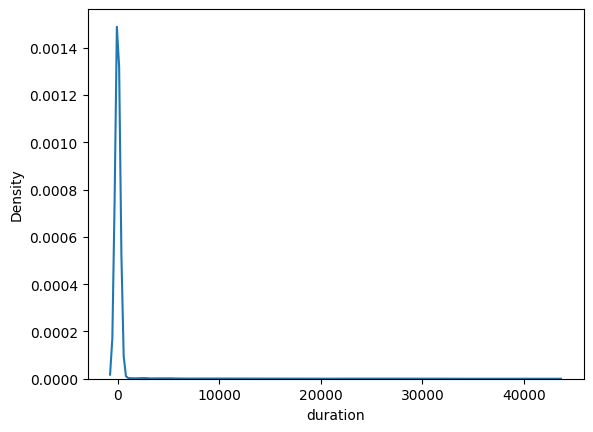

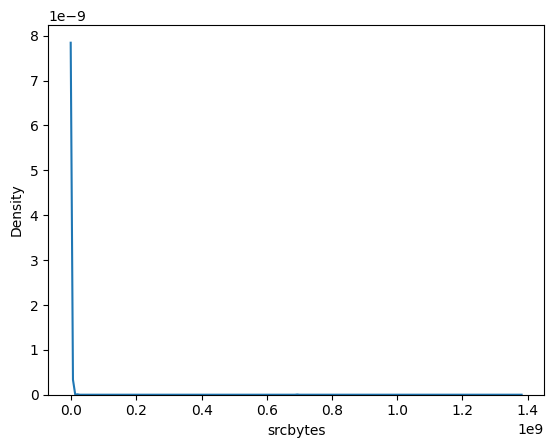

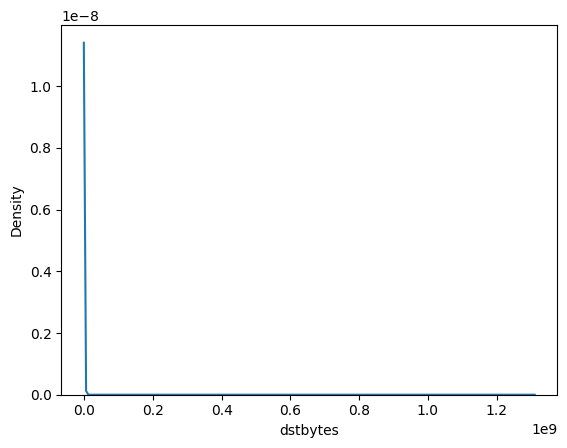

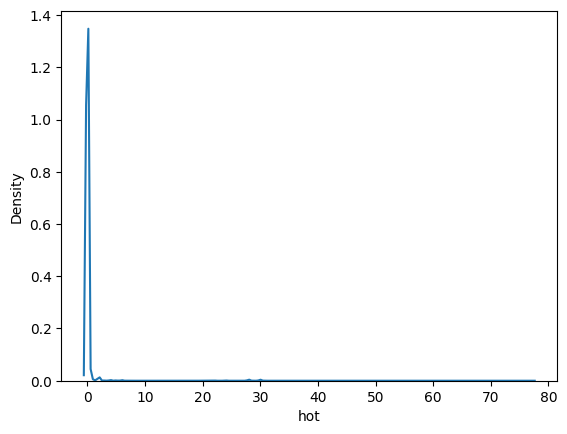

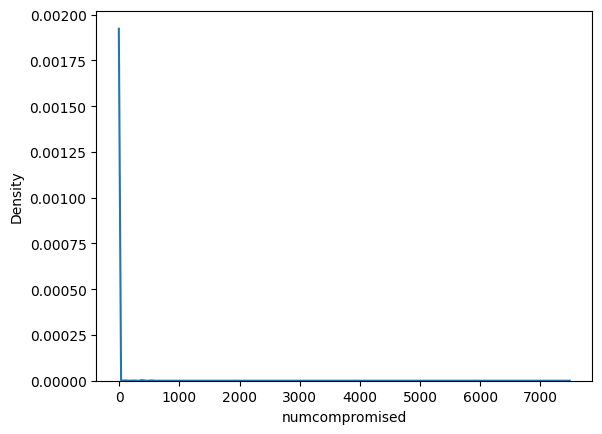

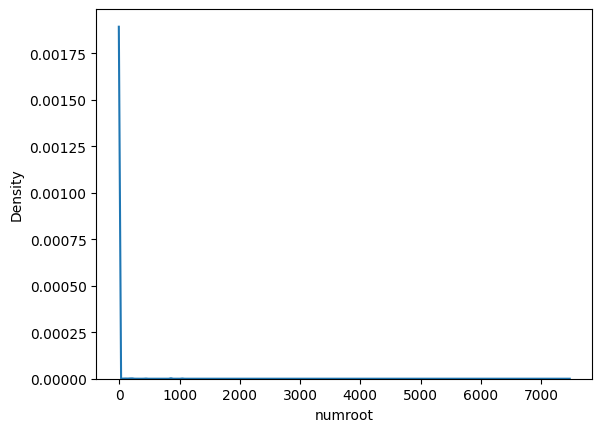

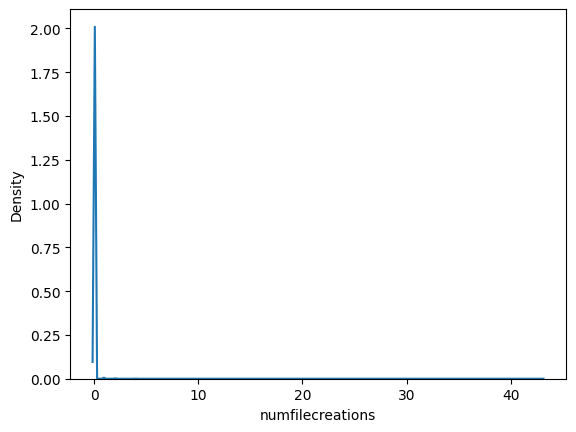

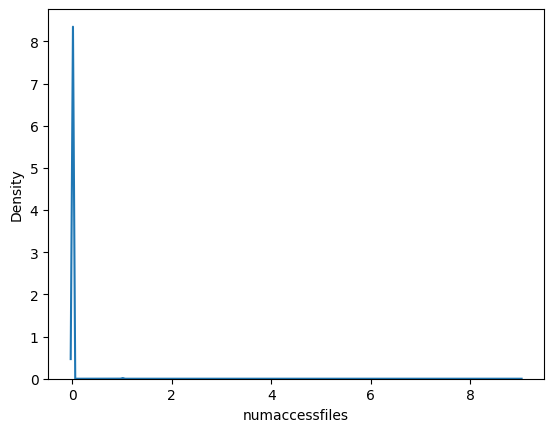

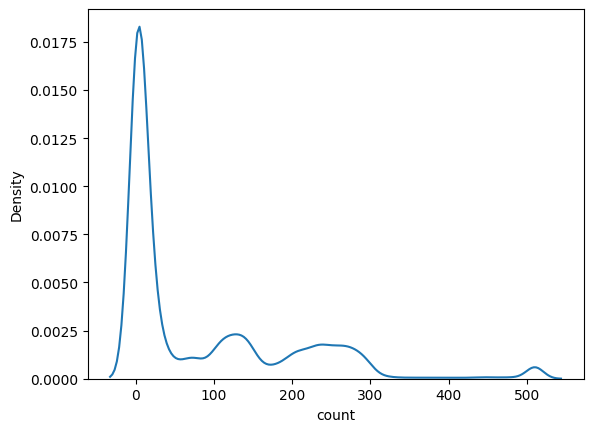

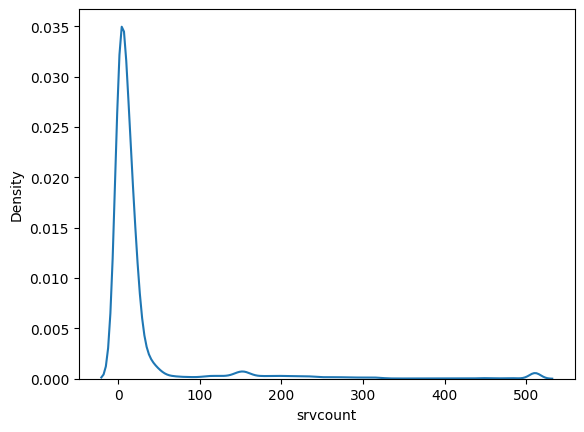

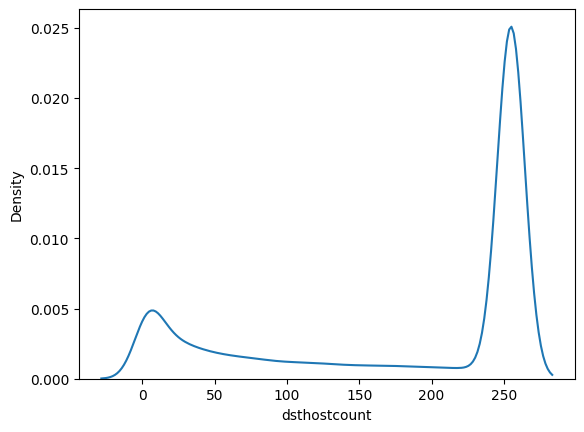

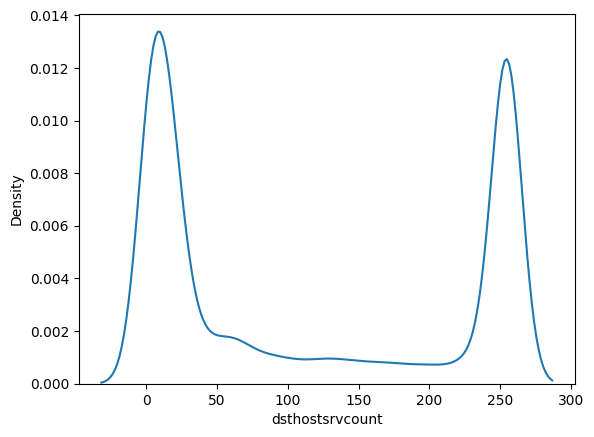

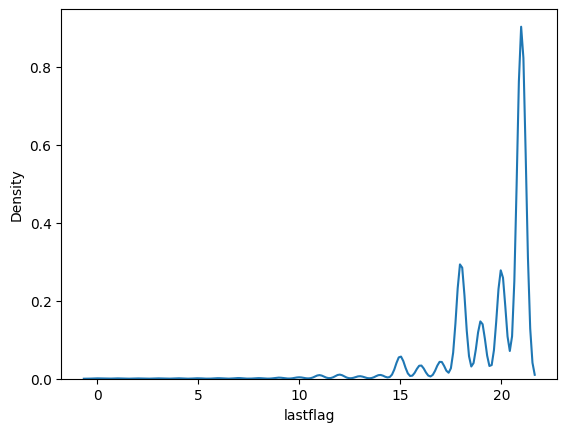

In [299]:
for col in non_bin_col:
    sns.kdeplot(df[col])
    plt.show()

### Outliers for 'duration' column

<Axes: xlabel='duration', ylabel='Density'>

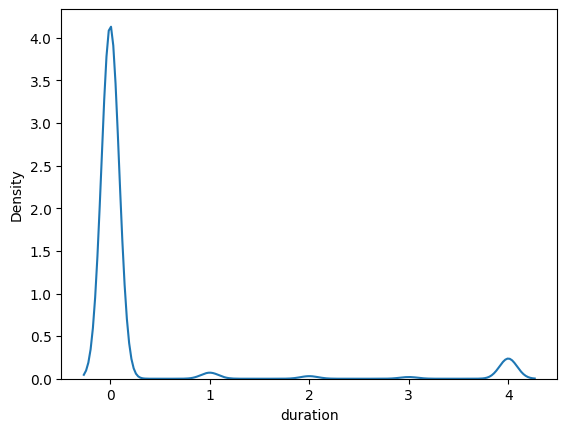

In [300]:
## After clipping, lets transform the data using box-cox transformation on non-binary columns to make sure we treat the outliers.
df3 = df.copy()
k = np.percentile(df['duration'], 95)
df3.loc[df3['duration']>k, 'duration'] = k
sns.kdeplot(df3['duration'])   

In [301]:
df3 = pd.DataFrame()
for col in non_bin_col:
    column, lambda_v = boxcox(df2[col] + 1)
    df3[col] = column
    

In [302]:
df3.describe()[non_bin_col]

duration       srcbytes       dstbytes            hot  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.008694       3.214034       1.994218       0.000815   
std         0.029579       2.863706       2.212235       0.005536   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       3.868968       0.000000       0.000000   
75%         0.000000       5.760722       4.246620       0.000000   
max         0.109366       7.531932       5.260409       0.038427   

       numcompromised        numroot  numfilecreations  numaccessfiles  \
count   125973.000000  125973.000000     125973.000000   125973.000000   
mean         0.000116       0.000049          0.000007        0.000007   
std          0.001140       0.000676          0.000147        0.000129   
min          0.000000       0.000000          0.000000        0.000000   
25%          0.000000       0.000000          0.000000        0.000000   
50%          0.000000       0.000000          0.000000        0.000000   
75%          0.000000       0.000000          0.000000        0.000000   
max          0.011342       0.009442          0.003084        0.002378   

               count       srvcount   dsthostcount  dsthostsrvcount  \
count  125973.000000  125973.000000  125973.000000    125973.000000   
mean        2.700655       1.522415     159.637694         6.174000   
std         1.612402       0.641201      86.085652         3.417318   
min         0.000000       0.000000       0.000000         0.000000   
25%         1.065146       0.943572      73.971997         3.048595   
50%         2.510683       1.633984     222.675371         6.378209   
75%         4.331892       1.994388     222.675371         9.922157   
max         5.255751       2.920108     222.675371         9.922157   

           lastflag  
count  1.259730e+05  
mean   1.602523e+09  
std    7.441198e+08  
min    0.000000e+00  
25%    7.393466e+08  
50%    1.585970e+09  
75%    2.261287e+09  
max    2.261287e+09

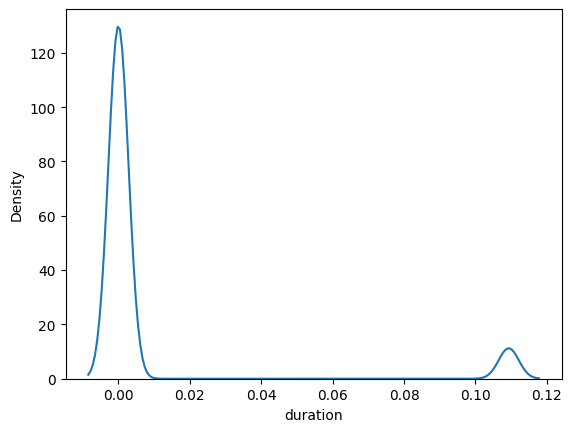

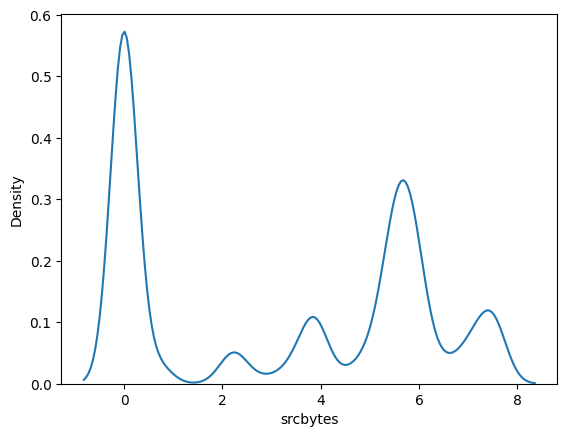

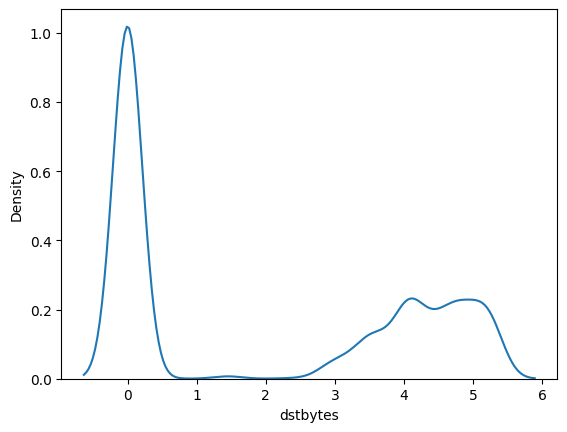

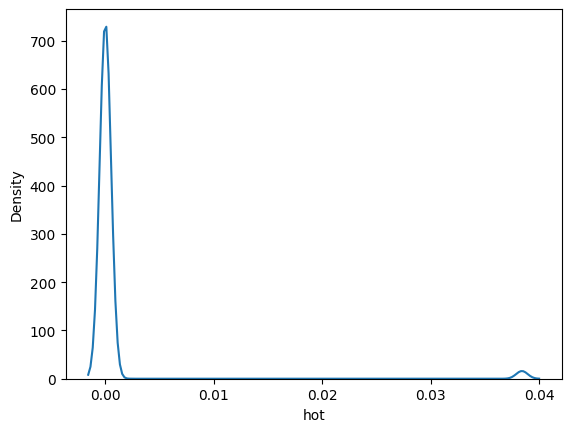

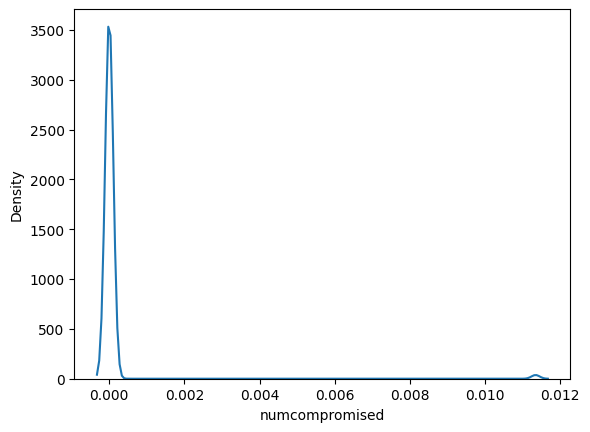

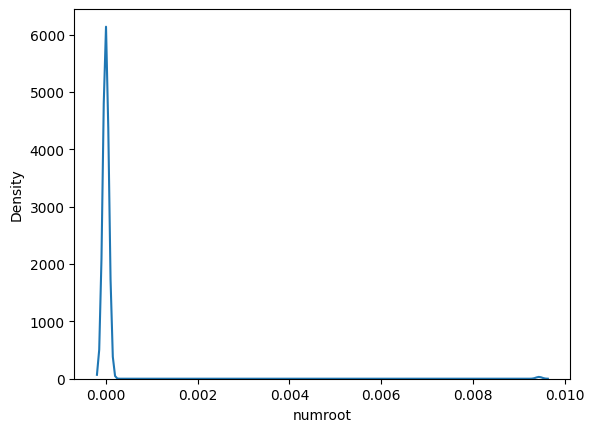

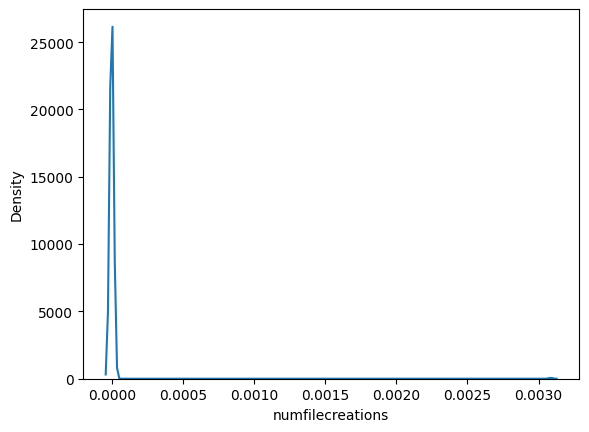

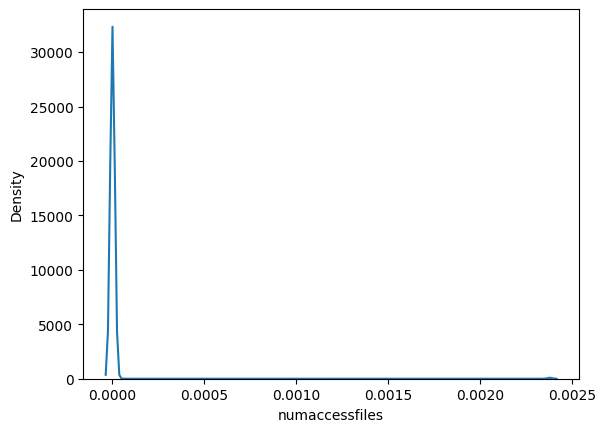

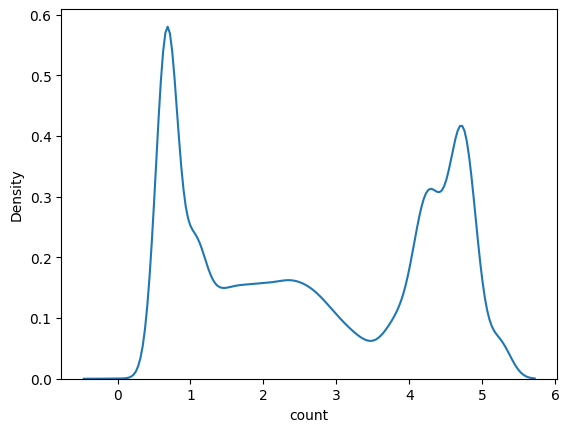

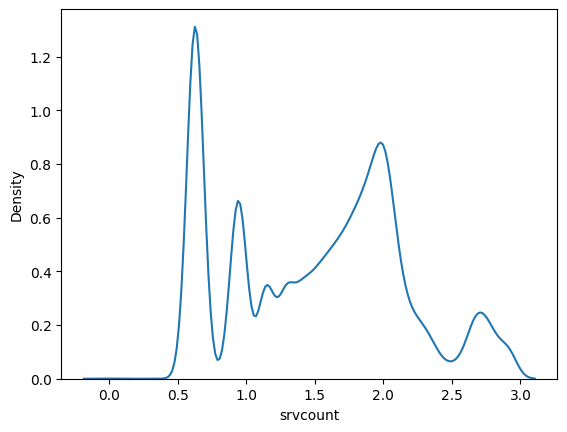

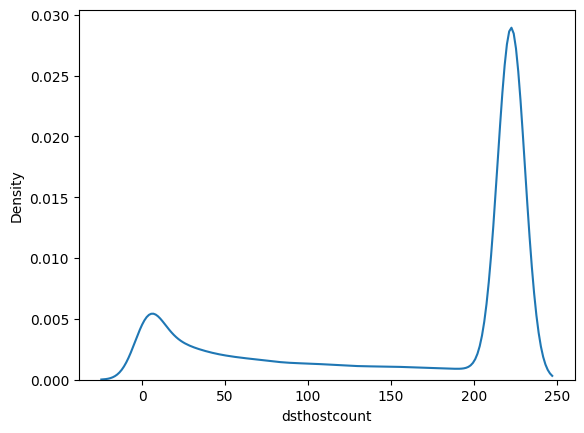

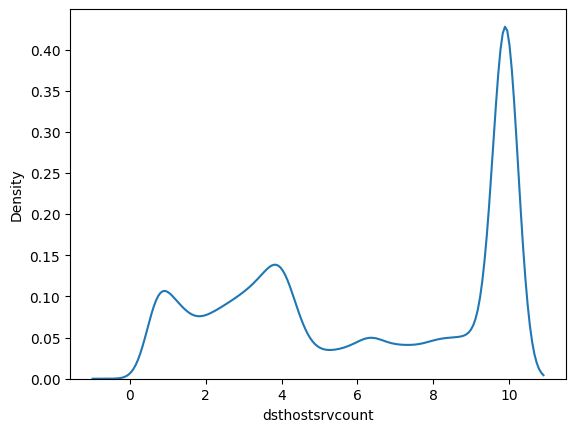

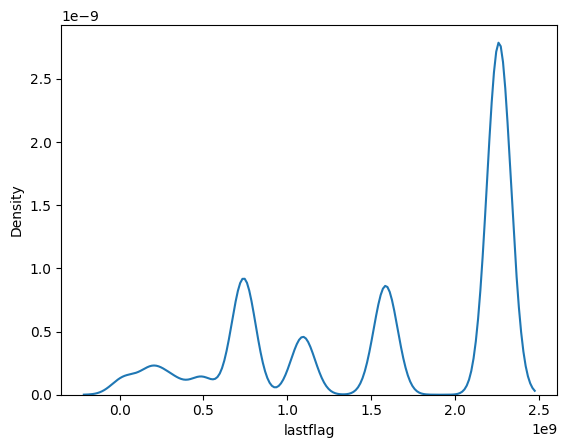

In [303]:
for col in non_bin_col:
    sns.kdeplot(df3[col])
    plt.show()

In [304]:
bin_col = df.columns[~df.columns.isin(non_bin_col)]
bin_col

Index(['protocoltype', 'service', 'flag', 'land', 'wrongfragment', 'urgent',
       'numfailedlogins', 'loggedin', 'rootshell', 'suattempted', 'numshells',
       'ishostlogin', 'isguestlogin', 'serrorrate', 'srvserrorrate',
       'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostsamesrvrate', 'dsthostdiffsrvrate',
       'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate',
       'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'attack?'],
      dtype='object')

In [305]:
# Now we join the non-binary columns with binary columns
df3 = pd.concat([df3, df[bin_col]], axis =1)

In [306]:
df3.drop_duplicates(inplace = True)
df.drop_duplicates(inplace = True)

In [307]:
df3

duration  srcbytes  dstbytes  hot  numcompromised  numroot  \
0            0.0  6.364809  0.000000  0.0             0.0      0.0   
1            0.0  5.097876  0.000000  0.0             0.0      0.0   
2            0.0  0.000000  0.000000  0.0             0.0      0.0   
3            0.0  5.579399  5.254500  0.0             0.0      0.0   
4            0.0  5.419534  4.155753  0.0             0.0      0.0   
...          ...       ...       ...  ...             ...      ...   
125967       0.0  6.035959  4.104679  0.0             0.0      0.0   
125968       0.0  0.000000  0.000000  0.0             0.0      0.0   
125970       0.0  7.531932  4.115430  0.0             0.0      0.0   
125971       0.0  0.000000  0.000000  0.0             0.0      0.0   
125972       0.0  5.132779  0.000000  0.0             0.0      0.0   

        numfilecreations  numaccessfiles     count  srvcount  ...  \
0                    0.0             0.0  1.065146  0.943572  ...   
1                    0.0             0.0  2.451380  0.629115  ...   
2                    0.0             0.0  4.218551  1.494510  ...   
3                    0.0             0.0  1.703883  1.403895  ...   
4                    0.0             0.0  3.120817  2.215567  ...   
...                  ...             ...       ...       ...  ...   
125967               0.0             0.0  1.333292  1.781873  ...   
125968               0.0             0.0  4.519658  2.124293  ...   
125970               0.0             0.0  0.679724  0.629115  ...   
125971               0.0             0.0  4.337114  1.633984  ...   
125972               0.0             0.0  0.679724  0.629115  ...   

        dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
0                     0.17                0.03                    0.17   
1                     0.00                0.60                    0.88   
2                     0.10                0.05                    0.00   
3                     1.00                0.00                    0.03   
4                     1.00                0.00                    0.00   
...                    ...                 ...                     ...   
125967                1.00                0.00                    0.33   
125968                0.10                0.06                    0.00   
125970                0.12                0.06                    0.00   
125971                0.03                0.05                    0.00   
125972                0.30                0.03                    0.30   

       dsthostsrvdiffhostrate dsthostserrorrate dsthostsrvserrorrate  \
0                        0.00              0.00                 0.00   
1                        0.00              0.00                 0.00   
2                        0.00              1.00                 1.00   
3                        0.04              0.03                 0.01   
4                        0.00              0.00                 0.00   
...                       ...               ...                  ...   
125967                   0.04              0.33                 0.00   
125968                   0.00              1.00                 1.00   
125970                   0.00              0.72                 0.00   
125971                   0.00              1.00                 1.00   
125972                   0.00              0.00                 0.00   

        dsthostrerrorrate  dsthostsrvrerrorrate   attack  attack?  
0                    0.05                  0.00   normal        0  
1                    0.00                  0.00   normal        0  
2                    0.00                  0.00  neptune        1  
3                    0.00                  0.01   normal        0  
4                    0.00                  0.00   normal        0  
...                   ...                   ...      ...      ...  
125967               0.00                  0.00   normal        0  
125968               0.00               

# Hypothesis Testing

## 1. Network Traffic Volume and Anomalies:
## Hypothesis: Network connections with unusually high or low traffic volume (bytes transferred) are more likely to be anomalous.
## Tests: Use t-tests or ANOVA to compare the means of Src_bytes and Dst_bytes in normal versus anomalous connections.


In [308]:
a_s = df3.loc[df3["attack?"]==1, "srcbytes"]
n_s = df3.loc[df3["attack?"]==0, "srcbytes"]

a_d = df3.loc[df3["attack?"]==1, "dstbytes"]
n_d = df3.loc[df3["attack?"]==0, "dstbytes"]

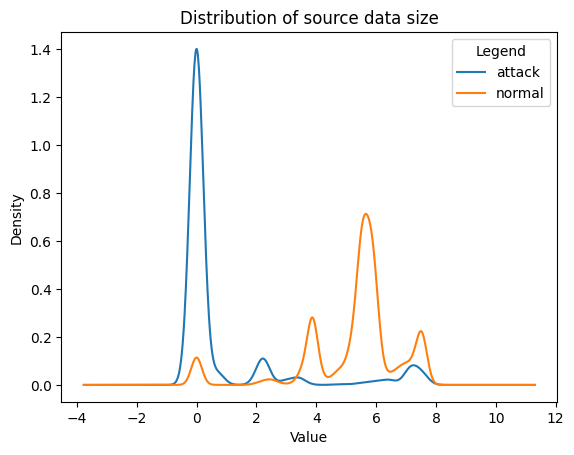

In [309]:
a_s.plot(kind = 'kde', label = "attack")
n_s.plot(kind = 'kde', label = "normal")
plt.title('Distribution of source data size')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Legend', loc='upper right')  # Custom legend title and location
plt.show()

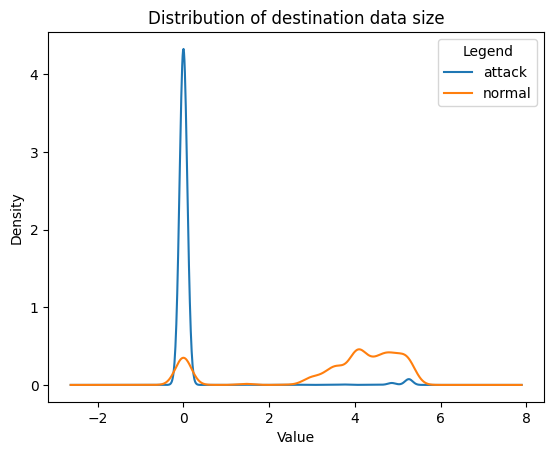

In [310]:
a_d.plot(kind = 'kde', label = "attack")
n_d.plot(kind = 'kde', label = "normal")
plt.title('Distribution of destination data size')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Legend', loc='upper right')  # Custom legend title and location
plt.show()

In [311]:
a_s = df.loc[df["attack?"]==1, "srcbytes"]
n_s = df.loc[df["attack?"]==0, "srcbytes"]

a_d = df.loc[df["attack?"]==1, "dstbytes"]
n_d = df.loc[df["attack?"]==0, "dstbytes"]

### Null hypothesis: The two sets of data have the same mean.
### Alternative hypothesis: The two sets of data have different mean.
### Alpha -> Significance level = 0.05

In [312]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a_s, n_s)
p_value

0.03558539933331456

### Result: Since p<0.05, we can conclude that there is a significant difference between the means of the attacked connection and normal connection

## Let's repeate the same experiment for destination data

### 2. Null hypothesis: The two sets of data have the same mean.
### Alternative hypothesis: The two sets of data have different mean.
### Alpha -> Significance level = 0.05

In [313]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a_d, n_d)
p_value

0.14390157812640422

### Result: Since p>0.05, we can conclude that there is NO significant difference between the means of the attacked connection and normal connection with respect to destintion data source.

### 3. Impact of Protocol Type on Anomaly Detection:
### Hypothesis: Certain protocols are more frequently associated with network anomalies.
### Tests: Chi-square test to determine if the distribution of Protocol_type differs significantly in normal and anomalous connections.

### Null hypothesis: The columns - protocol type and attack are independant
### Alternative hypothesis: The columns - protocol type and attack are dependant
### Alpha -> Significance level = 0.05

In [314]:
from scipy.stats import chi2_contingency
data = pd.crosstab(index = df['protocoltype'], columns = df['attack?'])
data


attack?           0      1
protocoltype              
icmp           1309   6982
tcp           53600  49089
udp           12434   2559

In [315]:
chi2, p, dof, expected = chi2_contingency(data)
p

0.0

In [316]:
expected

array([[ 4432.22605638,  3858.77394362],
       [54895.77391187, 47793.22608813],
       [ 8015.00003175,  6977.99996825]])

### Result: since p<<0.05, we can safely conclude that the categoric columns protocol type and attack (anamoly) are dependent.

In [317]:
ser = df['service'].value_counts()
ser[ser>100]

service
http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
daytime          521
gopher           518
efs              485
systat           477
link             475
exec             474
hostnames        460
name             451
mtp              439
echo             434
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbi

In [318]:
df.loc[~df['service'].isin(['http', 'private', 'domain_u', 'smtp', 'ftp_data']), 'service'] = "others"

In [319]:
df['service'].value_counts()

service
others      40566
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64

### 4. Role of Service in Network Security:
### Hypothesis: Specific services are targets of network anomalies more often than others.
### Tests: Chi-square test to compare the frequency of services in normal versus anomaly-flagged connections.


### Null hypothesis: The columns - service and attack are independant
### Alternative hypothesis: The columns - service and attack are dependant
### Alpha -> Significance level = 0.05

In [320]:
data = pd.crosstab(index = df['service'], columns = df['attack?'])
data

attack?       0      1
service               
domain_u   9034      9
ftp_data   4984   1876
http      38049   2289
others     7265  33301
private     982  20871
smtp       7029    284

In [321]:
chi2, p, dof, expected = chi2_contingency(data)
p

0.0

In [322]:
expected

array([[ 4834.23232756,  4208.76767244],
       [ 3667.23805895,  3192.76194105],
       [21564.00128599, 18773.99871401],
       [21685.88616608, 18880.11383392],
       [11682.2380907 , 10170.7619093 ],
       [ 3909.40407071,  3403.59592929]])

### Result: since p<<0.05, we can safely conclude that the categoric columns service and attack (anamoly) are dependent.

In [323]:
flag_col = ['flag', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']

In [324]:
df[flag_col]

flag  serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  \
0        SF         0.0            0.0         0.0            0.0   
1        SF         0.0            0.0         0.0            0.0   
2        S0         1.0            1.0         0.0            0.0   
3        SF         0.2            0.2         0.0            0.0   
4        SF         0.0            0.0         0.0            0.0   
...     ...         ...            ...         ...            ...   
125968   S0         1.0            1.0         0.0            0.0   
125969   SF         0.0            0.0         0.0            0.0   
125970   SF         0.0            0.0         0.0            0.0   
125971   S0         1.0            1.0         0.0            0.0   
125972   SF         0.0            0.0         0.0            0.0   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                    0.00                  0.00               0.05   
1                    0.00                  0.00               0.00   
2                    1.00                  1.00               0.00   
3                    0.03                  0.01               0.00   
4                    0.00                  0.00               0.00   
...                   ...                   ...                ...   
125968               1.00                  1.00               0.00   
125969               0.00                  0.00               0.00   
125970               0.72                  0.00               0.01   
125971               1.00                  1.00               0.00   
125972               0.00                  0.00               0.00   

        dsthostsrvrerrorrate  
0                       0.00  
1                       0.00  
2                       0.00  
3                       0.01  
4                       0.00  
...                      ...  
125968                  0.00  
125969                  0.00  
125970                  0.00  
125971                  0.00  
125972                  0.00  

[125973 rows x 9 columns]

## Logistic regression to evaluate whether the presence of Urgent packets increases the odds of an anomaly.

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [326]:
# We first split the data and then do data preprocessing to avoid data leakage
x_train, x_test, y_train, y_test = train_test_split(df[flag_col], df['attack?'], train_size = 0.8)

In [327]:
x_train

flag  serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  \
11060    SF         0.0            0.0         0.0            0.0   
52965    SF         0.0            0.0         0.0            0.0   
64293    SF         0.0            0.0         0.0            0.0   
47513    SF         0.0            0.0         0.0            0.0   
121371  REJ         0.0            0.0         1.0            1.0   
...     ...         ...            ...         ...            ...   
91283    SF         0.0            0.0         0.0            0.0   
121232   SF         0.0            0.0         0.0            0.0   
76226    SF         0.0            0.0         0.0            0.0   
81488    SF         0.0            0.0         0.0            0.0   
62381    S0         1.0            1.0         0.0            0.0   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
11060                 0.0                   0.0                0.0   
52965                 0.0                   0.0                0.0   
64293                 0.0                   0.0                0.0   
47513                 0.0                   0.0                0.0   
121371                0.0                   0.0                1.0   
...                   ...                   ...                ...   
91283                 0.0                   0.0                0.0   
121232                0.0                   0.0                0.0   
76226                 0.0                   0.0                0.0   
81488                 0.0                   0.0                0.0   
62381                 1.0                   1.0                0.0   

        dsthostsrvrerrorrate  
11060                   0.00  
52965                   0.00  
64293                   0.00  
47513                   0.00  
121371                  0.66  
...                      ...  
91283                   0.00  
121232                  0.00  
76226                   0.00  
81488                   0.00  
62381                   0.00  

[100778 rows x 9 columns]

In [328]:
# Target encoding of categoric column - 'flag'
ab = pd.concat([x_train['flag'], y_train], axis = 1)
ab

flag  attack?
11060    SF        0
52965    SF        0
64293    SF        0
47513    SF        0
121371  REJ        0
...     ...      ...
91283    SF        0
121232   SF        1
76226    SF        1
81488    SF        0
62381    S0        1

[100778 rows x 2 columns]

In [329]:
ab = ab.groupby('flag')['attack?'].mean().reset_index()
ab

flag   attack?
0      OTH  0.717949
1      REJ  0.760855
2     RSTO  0.862839
3   RSTOS0  1.000000
4     RSTR  0.938691
5       S0  0.989939
6       S1  0.010490
7       S2  0.060000
8       S3  0.045455
9       SF  0.154716
10      SH  0.990566

In [330]:
x_train = x_train.merge(ab, how = 'left', left_on = 'flag', right_on = 'flag').drop(columns = 'flag').rename(columns = {'attack?': 'flag'})
x_train

serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  \
0              0.0            0.0         0.0            0.0   
1              0.0            0.0         0.0            0.0   
2              0.0            0.0         0.0            0.0   
3              0.0            0.0         0.0            0.0   
4              0.0            0.0         1.0            1.0   
...            ...            ...         ...            ...   
100773         0.0            0.0         0.0            0.0   
100774         0.0            0.0         0.0            0.0   
100775         0.0            0.0         0.0            0.0   
100776         0.0            0.0         0.0            0.0   
100777         1.0            1.0         0.0            0.0   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                     0.0                   0.0                0.0   
1                     0.0                   0.0                0.0   
2                     0.0                   0.0                0.0   
3                     0.0                   0.0                0.0   
4                     0.0                   0.0                1.0   
...                   ...                   ...                ...   
100773                0.0                   0.0                0.0   
100774                0.0                   0.0                0.0   
100775                0.0                   0.0                0.0   
100776                0.0                   0.0                0.0   
100777                1.0                   1.0                0.0   

        dsthostsrvrerrorrate      flag  
0                       0.00  0.154716  
1                       0.00  0.154716  
2                       0.00  0.154716  
3                       0.00  0.154716  
4                       0.66  0.760855  
...                      ...       ...  
100773                  0.00  0.154716  
100774                  0.00  0.154716  
100775                  0.00  0.154716  
100776                  0.00  0.154716  
100777                  0.00  0.989939  

[100778 rows x 9 columns]

In [331]:
ab = pd.concat([x_test['flag'], y_test], axis = 1)
ab = ab.groupby('flag')['attack?'].mean().reset_index()
x_test = x_test.merge(ab, how = 'left', left_on = 'flag', right_on = 'flag').drop(columns = 'flag').rename(columns = {'attack?': 'flag'})

In [332]:
x_train

serrorrate  srvserrorrate  rerrorrate  srvrerrorrate  \
0              0.0            0.0         0.0            0.0   
1              0.0            0.0         0.0            0.0   
2              0.0            0.0         0.0            0.0   
3              0.0            0.0         0.0            0.0   
4              0.0            0.0         1.0            1.0   
...            ...            ...         ...            ...   
100773         0.0            0.0         0.0            0.0   
100774         0.0            0.0         0.0            0.0   
100775         0.0            0.0         0.0            0.0   
100776         0.0            0.0         0.0            0.0   
100777         1.0            1.0         0.0            0.0   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                     0.0                   0.0                0.0   
1                     0.0                   0.0                0.0   
2                     0.0                   0.0                0.0   
3                     0.0                   0.0                0.0   
4                     0.0                   0.0                1.0   
...                   ...                   ...                ...   
100773                0.0                   0.0                0.0   
100774                0.0                   0.0                0.0   
100775                0.0                   0.0                0.0   
100776                0.0                   0.0                0.0   
100777                1.0                   1.0                0.0   

        dsthostsrvrerrorrate      flag  
0                       0.00  0.154716  
1                       0.00  0.154716  
2                       0.00  0.154716  
3                       0.00  0.154716  
4                       0.66  0.760855  
...                      ...       ...  
100773                  0.00  0.154716  
100774                  0.00  0.154716  
100775                  0.00  0.154716  
100776                  0.00  0.154716  
100777                  0.00  0.989939  

[100778 rows x 9 columns]

## Normalizing the data 

In [333]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(sc.fit_transform(x_test), columns = x_test.columns)

In [334]:
log = LogisticRegression()
log.fit(x_train, y_train)
log.coef_

array([[ 0.42231764, -0.47549728, -0.95968772,  0.49143106,  0.30342497,
         1.63412975,  0.65479567,  0.27971549,  1.21134583]])

In [335]:
pd.DataFrame({'columns': x_train.columns, 'coefficients': log.coef_.reshape(-1)})

columns  coefficients
0            serrorrate      0.422318
1         srvserrorrate     -0.475497
2            rerrorrate     -0.959688
3         srvrerrorrate      0.491431
4     dsthostserrorrate      0.303425
5  dsthostsrvserrorrate      1.634130
6     dsthostrerrorrate      0.654796
7  dsthostsrvrerrorrate      0.279715
8                  flag      1.211346

In [336]:
y_train_pred = log.predict(x_train)
y_test_pred = log.predict(x_test)

## Results

In [337]:
print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.879755502192939 
 test accuracy: 0.8820797777336773 
 ----------------------------------------------------
 train precision: 0.8020351131685048
 test precision: 0.8071981621713605
 ----------------------------------------------------
 train f1_score: 0.861210371999267
 test f1_score: 0.8646160856687174
 ----------------------------------------------------
 train recall: 0.9298132805737603
 test recall: 0.9308281004709577


In [338]:
df['urgent'].describe()

count    125973.000000
mean          0.000111
std           0.014366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: urgent, dtype: float64

In [339]:
df[['urgent', 'attack?']].corr()

urgent   attack?
urgent   1.000000 -0.002787
attack? -0.002787  1.000000

### We can see that urgent column doesn't seem to have any effect on attack column

### Let us try to fit a model to predict attacks just based on urgent column

In [340]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df['urgent'], df['attack?'], train_size = 0.8, shuffle = True)


In [341]:
x_train = pd.DataFrame(np.array(x_train).reshape(-1, 1), columns = ['urgent'])
x_test = pd.DataFrame(np.array(x_test).reshape(-1, 1), columns = ['urgent'])

In [342]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(sc.fit_transform(x_test), columns = x_test.columns)

In [343]:
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
pd.DataFrame({'columns': x_train.columns, 'coefficients': model.coef_.reshape(-1)})

columns  coefficients
0  urgent     -0.004571

In [344]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [345]:
print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.5338069816825101 
 test accuracy: 0.5376860488192101 
 ----------------------------------------------------
 train precision: 0.0
 test precision: 0.0
 ----------------------------------------------------
 train f1_score: 0.0
 test f1_score: 0.0
 ----------------------------------------------------
 train recall: 0.0
 test recall: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Urgent column alone doesn't have a significant impact on attack

In [346]:
y_train_pred.sum()

0

In [347]:
df.iloc[:, 29:].head(20)

srvdiffhostrate  dsthostcount  dsthostsrvcount  dsthostsamesrvrate  \
0              0.00           150               25                0.17   
1              0.00           255                1                0.00   
2              0.00           255               26                0.10   
3              0.00            30              255                1.00   
4              0.09           255              255                1.00   
5              0.00           255               19                0.07   
6              0.00           255                9                0.04   
7              0.00           255               15                0.06   
8              0.00           255               23                0.09   
9              0.00           255               13                0.05   
10             0.00           255               12                0.05   
11             0.00           255               13                0.05   
12             0.43             8              219                1.00   
13             0.00             2               20                1.00   
14             0.00           255                1                0.00   
15             0.00           255                2                0.01   
16             0.22            91              255                1.00   
17             0.00             1               16                1.00   
18             0.00            66              255                1.00   
19             0.20           157              255                1.00   

    dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                 0.03                    0.17                    0.00   
1                 0.60                    0.88                    0.00   
2                 0.05                    0.00                    0.00   
3                 0.00                    0.03                    0.04   
4                 0.00                    0.00                    0.00   
5                 0.07                    0.00                    0.00   
6                 0.05                    0.00                    0.00   
7                 0.07                    0.00                    0.00   
8                 0.05                    0.00                    0.00   
9                 0.06                    0.00                    0.00   
10                0.07                    0.00                    0.00   
11                0.07                    0.00                    0.00   
12                0.00                    0.12                    0.03   
13                0.00                    1.00                    0.20   
14                0.07                    0.00                    0.00   
15                0.06                    0.00                    0.00   
16                0.00                    0.01                    0.02   
17                0.00                    1.00                    1.00   
18                0.00                    0.02                    0.03   
19                0.00                    0.01                    0.04   

    dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                0.00                  0.00               0.05   
1                0.00                  0.00               0.00   
2                1.00                  1.00               0.00   
3                0.03                  0.01               0.00   
4                0.00                  0.00               0.00   
5                0.00                  0.00               1.00   
6                1.00                  1.00               0.00   
7                1.00                  1.00               0.00   
8                1.00                  1.00               0.00   
9                1.00                  1.00               0.00   
10               0.00                  0.00               1.00   
11               1.00                  1.00               0.00   
12               0.00               

# ML Modeling

## Data Cleaning

In [348]:
df['srvcount'] = np.where(df['srvcount']> df['count'], df['count'], df['srvcount'])

### Feature Engineering: Creating new features

### Multiplying the rate with the count gives us the actual metric like server count and host count - these are new data points which are not available in the original dataset.

In [349]:
df['diffsrvcount_'] = df['diffsrvrate']*df['count']
df['diffhostcount_'] = df['srvdiffhostrate']*df['srvcount']
df['dsthostcount_'] = df['dsthostdiffsrvrate']*df['dsthostcount']
df['sameportcount'] = df['dsthostsamesrcportrate']*df['dsthostsrvcount']
df['diffportcount'] = df['dsthostsrvdiffhostrate']*df['dsthostsrvcount']

### Treating the outliers by clipping and applying box-cox transformation

In [350]:
df4 = df.copy()
k = np.percentile(df4['duration'], 95)
df4.loc[df4['duration']>k, 'duration'] = k

In [351]:
non_bin_col = ['duration', 'srcbytes', 'dstbytes', 'hot', 'numcompromised', 'numroot', 
'numfilecreations', 'numaccessfiles', 'count', 'srvcount', 'dsthostcount', 'dsthostsrvcount', 'lastflag', 'diffsrvcount_', 
    'dsthostcount_', 'dsthostcount_', 'dsthostcount_', 'diffportcount', 'sameportcount' ]

In [352]:
df5 = pd.DataFrame()
for col in non_bin_col:
    column, lambda_v = boxcox(df4[col] + 1)
    df5[col] = column

In [353]:
bin_col = df.columns[~df.columns.isin(non_bin_col)]
bin_col

Index(['protocoltype', 'service', 'flag', 'land', 'wrongfragment', 'urgent',
       'numfailedlogins', 'loggedin', 'rootshell', 'suattempted', 'numshells',
       'ishostlogin', 'isguestlogin', 'serrorrate', 'srvserrorrate',
       'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostsamesrvrate', 'dsthostdiffsrvrate',
       'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate',
       'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'attack?', 'diffhostcount_'],
      dtype='object')

In [354]:
df5 = pd.concat([df5, df[bin_col]], axis =1)

In [355]:
df5.drop_duplicates(inplace = True)

In [356]:
df5

duration  srcbytes  dstbytes  hot  numcompromised  numroot  \
0            0.0  5.216758  0.000000  0.0             0.0      0.0   
1            0.0  4.340009  0.000000  0.0             0.0      0.0   
2            0.0  0.000000  0.000000  0.0             0.0      0.0   
3            0.0  4.681479  5.189610  0.0             0.0      0.0   
4            0.0  4.569257  4.118550  0.0             0.0      0.0   
...          ...       ...       ...  ...             ...      ...   
125967       0.0  4.995837  4.068516  0.0             0.0      0.0   
125968       0.0  0.000000  0.000000  0.0             0.0      0.0   
125970       0.0  6.232019  4.079050  0.0             0.0      0.0   
125971       0.0  0.000000  0.000000  0.0             0.0      0.0   
125972       0.0  4.365110  0.000000  0.0             0.0      0.0   

        numfilecreations  numaccessfiles     count  srvcount  ...  \
0                    0.0             0.0  1.065146  0.913617  ...   
1                    0.0             0.0  2.451380  0.616156  ...   
2                    0.0             0.0  4.218551  1.415276  ...   
3                    0.0             0.0  1.703883  1.334621  ...   
4                    0.0             0.0  3.120817  2.007436  ...   
...                  ...             ...       ...       ...  ...   
125967               0.0             0.0  1.333292  1.100699  ...   
125968               0.0             0.0  4.519658  1.952287  ...   
125970               0.0             0.0  0.679724  0.616156  ...   
125971               0.0             0.0  4.337114  1.537869  ...   
125972               0.0             0.0  0.679724  0.616156  ...   

        dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                     0.03                    0.17                    0.00   
1                     0.60                    0.88                    0.00   
2                     0.05                    0.00                    0.00   
3                     0.00                    0.03                    0.04   
4                     0.00                    0.00                    0.00   
...                    ...                     ...                     ...   
125967                0.00                    0.33                    0.04   
125968                0.06                    0.00                    0.00   
125970                0.06                    0.00                    0.00   
125971                0.05                    0.00                    0.00   
125972                0.03                    0.30                    0.00   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                    0.00                  0.00               0.05   
1                    0.00                  0.00               0.00   
2                    1.00                  1.00               0.00   
3                    0.03                  0.01               0.00   
4                    0.00                  0.00               0.00   
...                   ...                   ...                ...   
125967               0.33                  0.00               0.00   
125968               1.00                  1.00               0.00   
125970               0.72                  0.00               0.01   
125971               1.00                  1.00               0.00   
125972               0.00                  0.00               0.00   

        dsthostsrvrerrorrate   attack attack? diffhostcount_  
0                       0.00   normal       0           0.00  
1                       0.00   normal       0           0.00  
2                       0.00  neptune       1           0.00  
3                       0.01   normal       0           0.00  
4                       0.00   normal       0           2.70  
...                      ...      ...     ...            ...  
125967                  0.00   normal       0           0.54  
125968                  0.00  neptune       1           

In [357]:
df5.describe()

duration       srcbytes       dstbytes            hot  \
count  119904.000000  119904.000000  119904.000000  119904.000000   
mean        0.008033       2.821430       2.073710       0.000856   
std         0.028525       2.464774       2.213537       0.005670   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       3.437573       0.000000       0.000000   
75%         0.000000       4.833069       4.303786       0.000000   
max         0.109366      12.223208       6.922971       0.038427   

       numcompromised        numroot  numfilecreations  numaccessfiles  \
count   119904.000000  119904.000000     119904.000000   119904.000000   
mean         0.000122       0.000051          0.000007        0.000007   
std          0.001168       0.000693          0.000151        0.000132   
min          0.000000       0.000000          0.000000        0.000000   
25%          0.000000       0.000000          0.000000        0.000000   
50%          0.000000       0.000000          0.000000        0.000000   
75%          0.000000       0.000000          0.000000        0.000000   
max          0.011342       0.009442          0.003084        0.002378   

               count       srvcount  ...  dsthostsamesrvrate  \
count  119904.000000  119904.000000  ...       119904.000000   
mean        2.717955       1.341009  ...            0.527284   
std         1.595189       0.570815  ...            0.447034   
min         0.000000       0.000000  ...            0.000000   
25%         1.065146       0.616156  ...            0.050000   
50%         2.565947       1.415276  ...            0.550000   
75%         4.326631       1.781393  ...            1.000000   
max         5.255751       2.552794  ...            1.000000   

       dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
count       119904.000000           119904.000000           119904.000000   
mean             0.078020                0.126522                0.025741   
std              0.180789                0.279569                0.098520   
min              0.000000                0.000000                0.000000   
25%              0.000000                0.000000                0.000000   
50%              0.020000                0.000000                0.000000   
75%              0.070000                0.050000                0.010000   
max              1.000000                1.000000                1.000000   

       dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
count      119904.000000         119904.000000      119904.000000   
mean            0.280662              0.274399           0.114201   
std             0.442608              0.443483           0.299822   
min             0.000000              0.000000           0.000000   
25%             0.000000              0.000000           0.000000   
50%             0.000000              0.000000           0.000000   
75%             1.000000              1.000000           0.000000   
max             1.000000              1.000000           1.000000   

       dsthostsrvrerrorrate        attack?  diffhostcount_  
count         119904.000000  119904.000000   119904.000000  
mean               0.115688       0.441403        0.290193  
std                0.313672       0.496557        0.646766  
min                0.000000       0.000000        0.000000  
25%                0.000000       0.000000        0.000000  
50%                0.000000       0.000000        0.000000  
75%                0.000000       1.000000        0.000000  
max                1.000000       1.000000       34.000000  

[8 rows x 44 columns]

In [358]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119904 entries, 0 to 125972
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                119904 non-null  float64
 1   srcbytes                119904 non-null  float64
 2   dstbytes                119904 non-null  float64
 3   hot                     119904 non-null  float64
 4   numcompromised          119904 non-null  float64
 5   numroot                 119904 non-null  float64
 6   numfilecreations        119904 non-null  float64
 7   numaccessfiles          119904 non-null  float64
 8   count                   119904 non-null  float64
 9   srvcount                119904 non-null  float64
 10  dsthostcount            119904 non-null  float64
 11  dsthostsrvcount         119904 non-null  float64
 12  lastflag                119904 non-null  float64
 13  diffsrvcount_           119904 non-null  float64
 14  dsthostcount_           1

In [359]:
df5.drop(columns= ['flag', 'attack'], inplace = True)

## We have two categoric columns - 'protocoltype' and 'service' - both of which are important columns to detect anamoly as we have proved that in hypothesis testing. So we will use target encoding to treat them.

In [360]:
## We will concatenate both the columns to create a single unique identifier.
df5['proto_service'] = df5[['protocoltype', 'service']].apply(lambda x: x[0] + x[1], axis = 1)

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_29102/1138965760.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df5['proto_service'] = df5[['protocoltype', 'service']].apply(lambda x: x[0] + x[1], axis = 1)


In [361]:
df5['proto_service'].value_counts()

proto_service
tcphttp        40331
tcpothers      26589
tcpprivate     18132
udpdomain_u     9004
tcpsmtp         7313
tcpftp_data     6859
icmpothers      6042
udpprivate      3277
udpothers       2357
Name: count, dtype: int64

In [362]:
df5.columns

Index(['duration', 'srcbytes', 'dstbytes', 'hot', 'numcompromised', 'numroot',
       'numfilecreations', 'numaccessfiles', 'count', 'srvcount',
       'dsthostcount', 'dsthostsrvcount', 'lastflag', 'diffsrvcount_',
       'dsthostcount_', 'diffportcount', 'sameportcount', 'protocoltype',
       'service', 'land', 'wrongfragment', 'urgent', 'numfailedlogins',
       'loggedin', 'rootshell', 'suattempted', 'numshells', 'ishostlogin',
       'isguestlogin', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack?',
       'diffhostcount_', 'proto_service'],
      dtype='object')

### Let's split the data and then do target encoding to prevent data leakage

In [363]:
x_train, x_test, y_train, y_test = train_test_split(df5.drop(columns = 'attack?'), df5['attack?'], train_size = 0.8)

In [364]:
ab = pd.concat([x_train['proto_service'], y_train], axis = 1)
ab = ab.groupby('proto_service')['attack?'].mean().reset_index()
x_train = x_train.merge(ab, how = 'left', left_on = 'proto_service', right_on = 'proto_service').drop(columns = 'proto_service').rename(columns = {'attack?': 'proto_service'})

In [365]:
x_train

duration  srcbytes  dstbytes  hot  numcompromised  numroot  \
0           0.0  0.000000  0.000000  0.0             0.0      0.0   
1           0.0  0.000000  0.000000  0.0             0.0      0.0   
2           0.0  5.892295  4.008413  0.0             0.0      0.0   
3           0.0  4.655892  4.665098  0.0             0.0      0.0   
4           0.0  5.725758  0.000000  0.0             0.0      0.0   
...         ...       ...       ...  ...             ...      ...   
95918       0.0  5.609052  4.011165  0.0             0.0      0.0   
95919       0.0  4.519559  4.441672  0.0             0.0      0.0   
95920       0.0  4.241521  3.871789  0.0             0.0      0.0   
95921       0.0  4.668804  4.436005  0.0             0.0      0.0   
95922       0.0  0.000000  0.000000  0.0             0.0      0.0   

       numfilecreations  numaccessfiles     count  srvcount  ...  \
0                   0.0             0.0  0.679724  0.616156  ...   
1                   0.0             0.0  4.750545  1.100699  ...   
2                   0.0             0.0  0.679724  0.616156  ...   
3                   0.0             0.0  1.538295  1.233493  ...   
4                   0.0             0.0  4.852442  2.481006  ...   
...                 ...             ...       ...       ...  ...   
95918               0.0             0.0  0.679724  0.616156  ...   
95919               0.0             0.0  2.755477  1.863515  ...   
95920               0.0             0.0  0.679724  0.616156  ...   
95921               0.0             0.0  1.961710  1.481742  ...   
95922               0.0             0.0  4.631014  1.481742  ...   

       dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
0                    1.00                0.00                    1.00   
1                    0.01                0.08                    0.00   
2                    0.76                0.03                    0.01   
3                    1.00                0.00                    0.01   
4                    1.00                0.00                    1.00   
...                   ...                 ...                     ...   
95918                0.70                0.22                    0.04   
95919                1.00                0.00                    0.03   
95920                0.10                0.68                    0.01   
95921                1.00                0.00                    0.00   
95922                0.09                0.11                    0.01   

       dsthostsrvdiffhostrate  dsthostserrorrate  dsthostsrvserrorrate  \
0                        0.18               0.00                   0.0   
1                        0.00               1.00                   1.0   
2                        0.01               0.01                   0.0   
3                        0.02               0.00                   0.0   
4                        0.00               0.00                   0.0   
...                       ...                ...                   ...   
95918                    0.04               0.04                   0.0   
95919                    0.03               0.00                   0.0   
95920                    0.03               0.00                   0.0   
95921                    0.00               0.00                   0.0   
95922                    0.00               0.97                   1.0   

       dsthostrerrorrate dsthostsrvrerrorrate diffhostcount_  proto_service  
0                   1.00                 0.97            0.0       0.056711  
1                   0.00                 0.00            0.0       0.867414  
2                   0.00                 0.00            0.0       0.038501  
3                   0.00                 0.00            2.0       0.056711  
4                   0.00                 0.00            0.0       0.782009  
...                  ...                  ...            ...            ...  
95918               0.00                 0.00    

In [366]:
x_test = x_test.merge(ab, how = 'left', left_on = 'proto_service', right_on = 'proto_service').drop(columns = 'proto_service').rename(columns = {'attack?': 'proto_service'})

In [367]:
x_test.drop(columns = ['protocoltype', 'service'], inplace = True)
x_train.drop(columns = ['protocoltype', 'service'], inplace = True)

## Normalizing using Standard Scaler

In [368]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(sc.fit_transform(x_test), columns = x_test.columns)

# Logistic regression

In [369]:
log = LogisticRegression(solver='saga', max_iter=1000) 
log.fit(x_train, y_train)
log.coef_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[-0.08703018, -0.89485218, -1.82535715,  1.22971573,  0.43769488,
        -0.18797965, -0.11215032, -0.04058675,  0.80381424,  1.0493165 ,
         0.26019038, -0.64970714, -2.06902272,  0.93763635,  1.45384587,
         0.53140858, -0.05615895, -0.10236996,  1.21822459,  0.04542203,
         0.00715617,  0.23365181, -0.06067659, -0.13198858,  0.00234145,
        -0.04101684, -0.18893475, -0.21946405,  0.98335932,  0.03287016,
         0.19807985,  0.15527979, -0.08162754,  0.39042286,  0.87639379,
        -0.1440164 ,  1.06070248,  0.11761507,  0.35917536,  1.48310768,
         0.87876486, -0.04903877, -0.19826502,  1.96230972]])

### We see that logistic regression model doesn't converge while training - the reason being that there are too many feature - around 46 columns. So we will do dimensionality reduction using PCA.

### Trial 1: keeping 95% variance

In [370]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_train)

In [371]:
log = LogisticRegression(solver='saga', max_iter=1000) 
log.fit(X_pca, y_train)
log.coef_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 2.35903109,  0.34933753,  0.62873558, -1.19276347,  0.02205653,
         1.95076054, -1.66258561,  0.77639476,  0.00367257,  0.21753442,
         0.19528831,  0.1262824 , -0.62767168, -0.44845364,  0.04486449,
         0.29807879,  0.16050605,  0.24697323, -0.37057346,  0.73470023,
        -0.35509366, -0.07727516, -0.25977769,  0.48538217, -0.40506234]])

### Still there is no convergance
### Trial 2: keeping 90% variance

In [372]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(x_train)

In [373]:
log = LogisticRegression(solver='saga', max_iter=1000) 
log.fit(X_pca, y_train)
log.coef_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 2.3239272 ,  0.35785834,  0.73965971, -1.07893093,  0.31976039,
         2.16451934, -1.49067104,  0.82884659, -0.09180538, -0.047379  ,
         0.18929323,  0.27353152, -0.61853949, -0.96464668,  0.2168513 ,
         0.2207898 ,  0.32933889,  0.25425151, -0.19057005,  0.59268995]])

### Still there is no convergance
### Trial 3: keeping 85% variance

In [374]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(x_train)

In [375]:
log = LogisticRegression(solver='saga', max_iter=1000) 
log.fit(X_pca, y_train)
log.coef_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 2.29322123,  0.35684741,  0.612915  , -0.98726712,  0.25457742,
         2.16828692, -1.56117206,  0.84596634, -0.01356864,  0.1287486 ,
         0.14018764,  0.13721959, -0.54265689, -0.61853989,  0.27523331,
         0.13461764,  0.20270448,  0.27078601]])

### Even with 85% variance we still could not find the convergance. So we will just proceed with the 85% variance model

In [145]:
pca

PCA(n_components=0.85)

In [378]:
X_pca_test = pca.transform(x_test)

In [379]:
y_train_pred = log.predict(X_pca)
y_test_pred = log.predict(X_pca_test)

In [380]:
print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.9794731190642495 
 test accuracy: 0.9798173554063634 
 ----------------------------------------------------
 train precision: 0.9826689364921738
 test precision: 0.9814710308502633
 ----------------------------------------------------
 train f1_score: 0.9768600674571929
 test f1_score: 0.9773344572445443
 ----------------------------------------------------
 train recall: 0.9711194709909573
 test recall: 0.9732326058571162


## Result Logistic regression: f1_score and accuracy of around 97% on test data.

## Support Vector Machines

In [149]:
from sklearn import svm

In [150]:
svm_c = svm.SVC(kernel = 'linear')

In [151]:
svm_c.fit(X_pca, y_train)

SVC(kernel='linear')

In [152]:
y_train_pred = svm_c.predict(X_pca)
y_test_pred = svm_c.predict(X_pca_test)

In [153]:
print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.9807449725300501 
 test accuracy: 0.9801926525165756 
 ----------------------------------------------------
 train precision: 0.9833459500378501
 test precision: 0.9818847381265252
 ----------------------------------------------------
 train f1_score: 0.9782662414835909
 test f1_score: 0.9778006262560172
 ----------------------------------------------------
 train recall: 0.9732387441174405
 test recall: 0.9737503490645071


In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
confusion_matrix(y_test_pred, y_test)

array([[13045,   193],
       [  282, 10461]])

### SVM Result: f1_score of 97%, accuracy of 98%

## Decision tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
DT = DecisionTreeClassifier(random_state = 45, criterion='gini', max_features = 'sqrt')

In [385]:
x_train, x_test, y_train, y_test = train_test_split(df5.drop(columns = 'attack?'), df5['attack?'], train_size = 0.8)

In [159]:
ab = pd.concat([x_train['proto_service'], y_train], axis = 1)
ab = ab.groupby('proto_service')['attack?'].mean().reset_index()
x_train = x_train.merge(ab, how = 'left', left_on = 'proto_service', right_on = 'proto_service').drop(columns = 'proto_service').rename(columns = {'attack?': 'proto_service'})

In [160]:
x_test = x_test.merge(ab, how = 'left', left_on = 'proto_service', right_on = 'proto_service').drop(columns = 'proto_service').rename(columns = {'attack?': 'proto_service'})

In [161]:
x_test.drop(columns = ['protocoltype', 'service'], inplace = True)
x_train.drop(columns = ['protocoltype', 'service'], inplace = True)

In [162]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_features='sqrt', random_state=45)

In [163]:
y_train_pred = DT.predict(x_train)
y_test_pred = DT.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 1.0 
 test accuracy: 0.9981235144489388 
 ----------------------------------------------------
 train precision: 1.0
 test precision: 0.9987801445059585
 ----------------------------------------------------
 train f1_score: 1.0
 test f1_score: 0.9978905920405006
 ----------------------------------------------------
 train recall: 1.0
 test recall: 0.997002622705133


### Since we have a train accuracy of 100%, we are overfitting the model with just 1 decision tree, Let's try grid search CV to pick the best hyperparameters.

In [164]:
grid_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [166]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = DT, cv = 5, param_grid = grid_params, scoring = 'accuracy')

In [167]:
gs.fit(x_train, y_train)



AttributeError: 'GridSearchCV' object has no attribute 'best_param_'

In [170]:
gs.best_params_


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [169]:
gs.best_score_

0.9976335227884066

In [173]:
DT2 = DecisionTreeClassifier(random_state = 65, criterion = 'gini', max_features = 'sqrt', max_depth = None, min_samples_leaf = 1, min_samples_split = 5)
DT2.fit(x_train, y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_split=5,
                       random_state=65)

In [174]:
y_train_pred = DT2.predict(x_train)
y_test_pred = DT2.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.999489173607998 
 test accuracy: 0.9972478211917768 
 ----------------------------------------------------
 train precision: 0.9992666020014668
 test precision: 0.9963404335178756
 ----------------------------------------------------
 train f1_score: 0.9994202898550725
 test f1_score: 0.9969016993709511
 ----------------------------------------------------
 train recall: 0.9995740249905339
 test recall: 0.997463597933302


## Result Decision Tree Classifier: 99% Accuracy and f1_score
## Not the best model as it is overfitting

In [216]:
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': DT2.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
2                 dstbytes    0.641629
15           diffportcount    0.084283
12                lastflag    0.057527
13           diffsrvcount_    0.049945
8                    count    0.025015
1                 srcbytes    0.022385
11         dsthostsrvcount    0.020256
40       dsthostrerrorrate    0.016788
28           srvserrorrate    0.012620
36  dsthostsamesrcportrate    0.012489
16           sameportcount    0.011585
29              rerrorrate    0.006561
43           proto_service    0.005068
18           wrongfragment    0.005059
39    dsthostsrvserrorrate    0.004441
37  dsthostsrvdiffhostrate    0.003365
34      dsthostsamesrvrate    0.003093
10            dsthostcount    0.002721
9                 srvcount    0.002715
35      dsthostdiffsrvrate    0.001926
32             diffsrvrate    0.001760
3                      hot    0.001429
14           dsthostcount_    0.001228
26            isguestlogin    0.001184
38       dsthostserrorrate    0.001104
0                 duration    0.000685
5                  numroot    0.000648
31             samesrvrate    0.000500
21                loggedin    0.000491
41    dsthostsrvrerrorrate    0.000466
30           srvrerrorrate    0.000383
27              serrorrate    0.000373
33         srvdiffhostrate    0.000129
42          diffhostcount_    0.000080
24               numshells    0.000040
17                    land    0.000033
6         numfilecreations    0.000000
4           numcompromised    0.000000
7           numaccessfiles    0.000000
25             ishostlogin    0.000000
19                  urgent    0.000000
20         numfailedlogins    0.000000
22               rootshell    0.000000
23             suattempted    0.000000

## Random Forest Classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rf = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', random_state = 23)

In [187]:
param_grid = {
    'n_estimators': [50,100,150],
    'min_samples_split': [3,7,11],
    'min_samples_leaf': [1, 3, 7, 9]
}

In [188]:
## Using Grid Search CV to pick the best model
gs = GridSearchCV(estimator = rf, cv = 5, n_jobs = -1, scoring = 'accuracy', param_grid = param_grid)

In [189]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 7, 9],
                         'min_samples_split': [3, 7, 11],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [190]:
gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}

In [191]:
gs.best_score_

0.9994996003749975

### This model is most likely overfitting because of just 1 min_samples_leaf and just 3 min_split_samples. Apart from that it is giving 99.9% accuracy which is a signal that it is overfitting.

In [194]:
param_grid = {
    'max_depth': [5,10,20],
    'min_samples_split': [3,7,11],
    'min_samples_leaf': [3, 7, 9]
}

In [195]:
gs = GridSearchCV(estimator = rf, cv = 5, n_jobs = -1, scoring = 'accuracy', param_grid = param_grid)

In [196]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [3, 7, 9],
                         'min_samples_split': [3, 7, 11]},
             scoring='accuracy')

In [197]:
gs.best_params_

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 7}

In [198]:
gs.best_score_

0.9993432260355961

In [199]:
rf = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', random_state = 23, n_estimators = 150,
                           min_samples_split = 7, min_samples_leaf = 3, max_depth = 20)

In [200]:
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.9998331995454688 
 test accuracy: 0.999207706100663 
 ----------------------------------------------------
 train precision: 0.9998580520002839
 test precision: 0.9996246598479872
 ----------------------------------------------------
 train f1_score: 0.9998107449551702
 test f1_score: 0.9991090269636577
 ----------------------------------------------------
 train recall: 0.9997634423863933
 test recall: 0.9985939257592801


### Result Random Forest: 99.9% Accuracy and f1_score
### Very much unlikely to overfit as we have changed the hyperparameters.
### Overall a good model.

In [212]:
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [215]:
feature_importance_df

Feature  Importance
1                 srcbytes    0.164305
43           proto_service    0.136203
2                 dstbytes    0.083289
13           diffsrvcount_    0.080454
8                    count    0.058244
12                lastflag    0.056124
31             samesrvrate    0.055139
14           dsthostcount_    0.055130
32             diffsrvrate    0.053162
34      dsthostsamesrvrate    0.029169
11         dsthostsrvcount    0.026893
28           srvserrorrate    0.021370
39    dsthostsrvserrorrate    0.018268
21                loggedin    0.017698
35      dsthostdiffsrvrate    0.016780
38       dsthostserrorrate    0.016611
36  dsthostsamesrcportrate    0.015053
9                 srvcount    0.014682
27              serrorrate    0.010684
16           sameportcount    0.009375
37  dsthostsrvdiffhostrate    0.009355
40       dsthostrerrorrate    0.007827
10            dsthostcount    0.006844
3                      hot    0.005932
15           diffportcount    0.005321
41    dsthostsrvrerrorrate    0.004852
4           numcompromised    0.004580
33         srvdiffhostrate    0.003400
29              rerrorrate    0.002919
0                 duration    0.002905
30           srvrerrorrate    0.002633
18           wrongfragment    0.002175
42          diffhostcount_    0.001730
26            isguestlogin    0.000514
5                  numroot    0.000162
20         numfailedlogins    0.000082
6         numfilecreations    0.000061
22               rootshell    0.000025
17                    land    0.000018
24               numshells    0.000017
7           numaccessfiles    0.000015
23             suattempted    0.000004
25             ishostlogin    0.000000
19                  urgent    0.000000

## XGBoost

In [203]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.0 MB/s eta 0:00:0000:01:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [208]:
from xgboost import XGBClassifier

In [ ]:
# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1,3,5,10,15],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [221]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators = 200,
                           eta = 0.3, min_samples_leaf = 3, max_depth = 7, min_child_weight = 1, subsample = 0.5,
                  colsample_bytree = 0.7)

In [222]:
xgb.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:23:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, min_samples_leaf=3,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=200, n_jobs=None, ...)

In [223]:

y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 1.0 
 test accuracy: 0.9995830032108752 
 ----------------------------------------------------
 train precision: 1.0
 test precision: 0.9998123299239936
 ----------------------------------------------------
 train f1_score: 1.0
 test f1_score: 0.99953095684803
 ----------------------------------------------------
 train recall: 1.0
 test recall: 0.9992497420988464


### With train accuracy of 100% it suggests that it is overfitting, let's change the hyperparameters

In [224]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators = 150,
                           eta = 0.1, min_samples_leaf = 3, max_depth = 7, min_child_weight = 5, subsample = 0.5,
                  colsample_bytree = 0.7)

In [225]:
xgb.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:26:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=5, min_samples_leaf=3,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=150, n_jobs=None, ...)

In [226]:

y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 0.9997497993182032 
 test accuracy: 0.999374504816313 
 ----------------------------------------------------
 train precision: 0.9997870780004259
 test precision: 0.9997184948859904
 ----------------------------------------------------
 train f1_score: 0.9997161241483725
 test f1_score: 0.9992965342587816
 ----------------------------------------------------
 train recall: 0.999645180366647
 test recall: 0.9988749296831052


### Result XGBoost: 99.9% accuracy and f1_score
### unlikely to overfit as we have given higher value to min_samples_split and min_samples_leaf. And lower max_depth and eta values.

In [231]:
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
43           proto_service    0.209783
13           diffsrvcount_    0.169984
1                 srcbytes    0.110850
2                 dstbytes    0.088170
4           numcompromised    0.065443
8                    count    0.052293
9                 srvcount    0.031995
12                lastflag    0.028999
38       dsthostserrorrate    0.027059
21                loggedin    0.026680
14           dsthostcount_    0.022064
28           srvserrorrate    0.019147
32             diffsrvrate    0.014257
39    dsthostsrvserrorrate    0.013054
18           wrongfragment    0.011778
26            isguestlogin    0.011431
3                      hot    0.011056
41    dsthostsrvrerrorrate    0.008546
27              serrorrate    0.007836
31             samesrvrate    0.007785
16           sameportcount    0.006965
37  dsthostsrvdiffhostrate    0.005542
0                 duration    0.005524
10            dsthostcount    0.005249
34      dsthostsamesrvrate    0.004871
5                  numroot    0.004736
36  dsthostsamesrcportrate    0.004535
40       dsthostrerrorrate    0.004040
11         dsthostsrvcount    0.003784
35      dsthostdiffsrvrate    0.003716
15           diffportcount    0.003682
30           srvrerrorrate    0.002833
29              rerrorrate    0.002648
42          diffhostcount_    0.002562
33         srvdiffhostrate    0.000652
6         numfilecreations    0.000447
7           numaccessfiles    0.000000
24               numshells    0.000000
22               rootshell    0.000000
25             ishostlogin    0.000000
20         numfailedlogins    0.000000
19                  urgent    0.000000
17                    land    0.000000
23             suattempted    0.000000

## LightGBM

In [227]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42)
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm,
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [232]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}
Best Cross-Validation Accuracy: 0.9996976755888355


In [233]:
lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1, learning_rate = 0.1, max_depth = 10, n_estimators = 200, num_leaves = 31)
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 42269, number of negative: 53654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 95923, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440656 -> initscore=-0.238502
[LightGBM] [Info] Start training from score -0.238502


LGBMClassifier(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)

In [234]:

y_train_pred = lgbm.predict(x_train)
y_test_pred = lgbm.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 1.0 
 test accuracy: 0.9996664025687002 
 ----------------------------------------------------
 train precision: 1.0
 test precision: 0.9997184948859904
 ----------------------------------------------------
 train f1_score: 1.0
 test f1_score: 0.9996246950647402
 ----------------------------------------------------
 train recall: 1.0
 test recall: 0.9995309128436063


### Train accuracy of 100%, suggesting overfitting, so lets change the hyperparameters

In [235]:
lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1, learning_rate = 0.1, max_depth = 7, n_estimators = 150, num_leaves = 31)
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 42269, number of negative: 53654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 95923, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440656 -> initscore=-0.238502
[LightGBM] [Info] Start training from score -0.238502


LGBMClassifier(max_depth=7, n_estimators=150, n_jobs=-1, random_state=42)

In [236]:

y_train_pred = lgbm.predict(x_train)
y_test_pred = lgbm.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

 train accuracy: 1.0 
 test accuracy: 0.9995830032108752 
 ----------------------------------------------------
 train precision: 1.0
 test precision: 0.9997184948859904
 ----------------------------------------------------
 train f1_score: 1.0
 test f1_score: 0.9995309128436063
 ----------------------------------------------------
 train recall: 1.0
 test recall: 0.9993434011818779


## Result LightGBM: 99.95% test accuracy and f1_score
## 100% results on train data suggest overfit even after tuning the hyperparameters with lower max_depth and lower n_estimators

In [257]:
confusion_matrix(y_test_pred, y_test)

array([[13317,     3],
       [    7, 10654]])

### We successfully bought down the false negatives and false positives to single digits!

In [237]:
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
1                 srcbytes         703
12                lastflag         612
43           proto_service         406
38       dsthostserrorrate         183
14           dsthostcount_         179
39    dsthostsrvserrorrate         177
11         dsthostsrvcount         168
10            dsthostcount         159
8                    count         145
2                 dstbytes         139
16           sameportcount         129
40       dsthostrerrorrate         123
34      dsthostsamesrvrate         111
15           diffportcount         110
9                 srvcount         106
13           diffsrvcount_         101
36  dsthostsamesrcportrate          95
37  dsthostsrvdiffhostrate          85
35      dsthostdiffsrvrate          84
21                loggedin          79
18           wrongfragment          70
41    dsthostsrvrerrorrate          69
0                 duration          60
31             samesrvrate          59
3                      hot          57
27              serrorrate          55
28           srvserrorrate          52
29              rerrorrate          33
4           numcompromised          28
33         srvdiffhostrate          27
5                  numroot          23
32             diffsrvrate          19
26            isguestlogin          17
30           srvrerrorrate          10
6         numfilecreations           9
20         numfailedlogins           7
17                    land           6
42          diffhostcount_           4
22               rootshell           1
7           numaccessfiles           0
24               numshells           0
25             ishostlogin           0
23             suattempted           0
19                  urgent           0

## Unsupervised Learning - T-SNE

In [239]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(pd.concat([x_train, x_test], axis = 0)), columns = x_train.columns)
X

duration  srcbytes  dstbytes       hot  numcompromised   numroot  \
0      -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   
1      -0.281624  0.765893  1.351715 -0.150914       -0.104123 -0.073771   
2      -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   
3      -0.281624  0.749513  1.149976 -0.150914       -0.104123 -0.073771   
4      -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   
...          ...       ...       ...       ...             ...       ...   
119899 -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   
119900  3.552382 -0.269541  0.344227 -0.150914       -0.104123 -0.073771   
119901 -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   
119902  3.552382  0.754656  1.038561  6.626301       -0.104123 -0.073771   
119903 -0.281624 -1.144706 -0.936835 -0.150914       -0.104123 -0.073771   

        numfilecreations  numaccessfiles     count  srvcount  ...  \
0              -0.048983       -0.055711  1.266899 -0.188356  ...   
1              -0.048983       -0.055711 -0.868029 -0.420996  ...   
2              -0.048983       -0.055711  1.001790  0.429495  ...   
3              -0.048983       -0.055711 -0.062863  0.811697  ...   
4              -0.048983       -0.055711  0.856355 -1.269861  ...   
...                  ...             ...       ...       ...  ...   
119899         -0.048983       -0.055711  0.984668  0.848828  ...   
119900         -0.048983       -0.055711 -1.277742 -1.269861  ...   
119901         -0.048983       -0.055711  1.348884  0.771503  ...   
119902         -0.048983       -0.055711 -1.277742 -1.269861  ...   
119903         -0.048983       -0.055711  1.031050 -0.011191  ...   

        dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
0                -1.134784           -0.154986               -0.452565   
1                 1.057454           -0.431552                0.727830   
2                -1.090044           -0.044359               -0.452565   
3                 1.057454           -0.431552               -0.416796   
4                -1.000565           -0.044359               -0.452565   
...                    ...                 ...                     ...   
119899           -1.045305           -0.044359               -0.452565   
119900           -1.157153           -0.320925               -0.452565   
119901           -1.045305            0.010954               -0.452565   
119902           -0.821607           -0.210299               -0.416796   
119903           -1.134784           -0.099672               -0.452565   

        dsthostsrvdiffhostrate  dsthostserrorrate  dsthostsrvserrorrate  \
0                    -0.261281           1.625234              1.636148   
1                     0.449239          -0.634113             -0.618738   
2                    -0.261281           1.625234              1.636148   
3                     0.043227          -0.634113             -0.618738   
4                    -0.261281           1.625234              1.636148   
...                        ...                ...                   ...   
119899               -0.261281          -0.634113             -0.618738   
119900               -0.261281          -0.634113             -0.618738   
119901               -0.261281          -0.634113             -0.618738   
119902               -0.261281          -0.634113             -0.618738   
119903               -0.261281           1.625234              1.636148   

        dsthostrerrorrate  dsthostsrvrerrorrate  diffhostcount_  proto_service  
0               -0.380897             -0.368821       -0.448685       1.342784  
1               -0.380897             -0.368821        0.339857      -0.923010  
2               -0.380897             -0.368821       -0.448685       1.023809  
3               -0.380897             -0.368821        1.530402      -0.923010  
4               -0.380897             -0.368821       -0.448685       1

In [240]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

In [241]:
y_tsne = pd.concat([y_train, y_test], axis = 0)

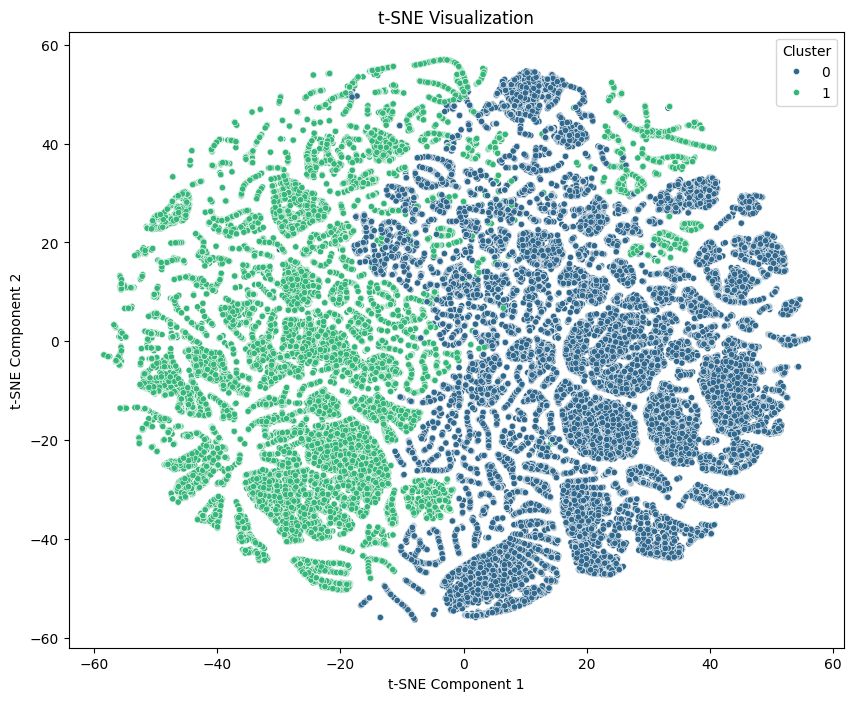

In [243]:
# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_tsne, palette='viridis', s=20)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

## UMAP

In [244]:
import umap

In [251]:
# Initialize UMAP with parameters
reducer = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.1)
X_umap = reducer.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


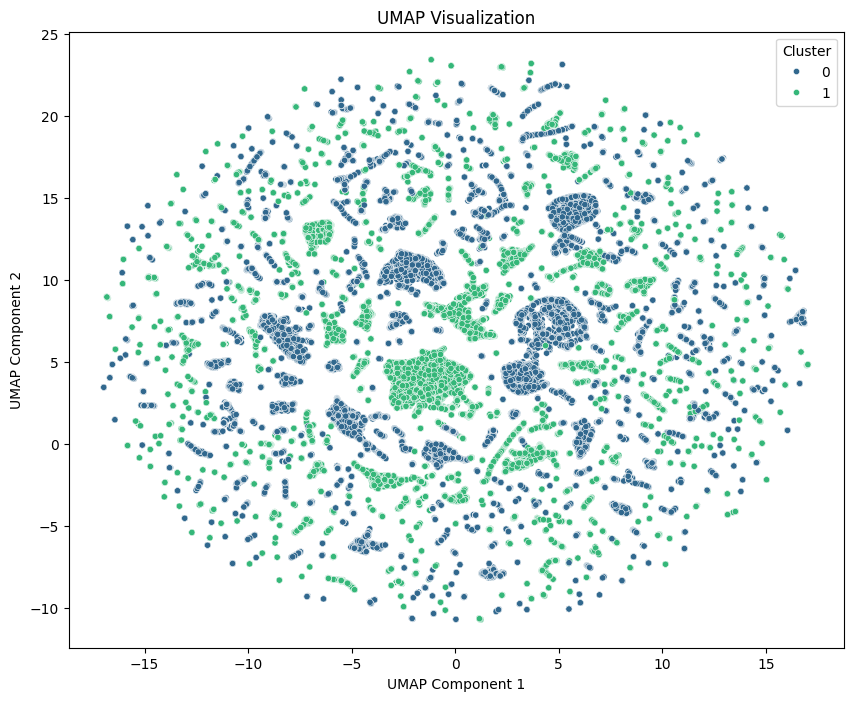

In [252]:
# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_tsne, palette='viridis', s=20)
plt.title("UMAP Visualization")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Cluster")
plt.show()

## Saving the pickle file

In [427]:
def transform_(test):
    test.drop(columns = ['numoutboundcmds', 'flag'], inplace = True)
    test['srvcount'] = np.where(test['srvcount']> test['count'], test['count'], test['srvcount'])
    test['diffsrvcount_'] = test['diffsrvrate']*test['count']
    test['diffhostcount_'] = test['srvdiffhostrate']*test['srvcount']
    test['dsthostcount_'] = test['dsthostdiffsrvrate']*test['dsthostcount']
    test['sameportcount'] = test['dsthostsamesrcportrate']*test['dsthostsrvcount']
    test['diffportcount'] = test['dsthostsrvdiffhostrate']*test['dsthostsrvcount']
    
    test['proto_service'] = test[['protocoltype', 'service']].apply(lambda x: x[0] + x[1], axis = 1)
    
    test = test.merge(ab, how = 'left', left_on = 'proto_service', right_on = 'proto_service').drop(columns = 'proto_service').rename(columns = {'attack?': 'proto_service'})
    test.drop(columns = ['protocoltype', 'service'], inplace = True)
    return test

In [432]:
df = pd.read_csv('Network_anomaly_data.csv')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators = 100,
                           eta = 0.3, min_samples_leaf = 3, max_depth = 7, min_child_weight = 1, subsample = 0.5,
                  colsample_bytree = 0.7)
df['attack?'] = np.where(df['attack']=="normal",0,1)
X = transform_(df.drop(columns = ['attack', 'attack?']))
Y = df['attack?']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)
xgb.fit(x_train, y_train)


y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

print(f" train accuracy: {accuracy_score(y_train_pred, y_train)} \n \
test accuracy: {accuracy_score(y_test_pred, y_test)} \n \
----------------------------------------------------\n \
train precision: {precision_score(y_train_pred, y_train)}\n \
test precision: {precision_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train f1_score: {f1_score(y_train_pred, y_train)}\n \
test f1_score: {f1_score(y_test_pred, y_test)}\n \
----------------------------------------------------\n \
train recall: {recall_score(y_train_pred, y_train)}\n \
test recall: {recall_score(y_test_pred, y_test)}")

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_29102/1934187345.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test['proto_service'] = test[['protocoltype', 'service']].apply(lambda x: x[0] + x[1], axis = 1)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:11:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 train accuracy: 0.9999801543987775 
 test accuracy: 0.9994840246080572 
 ----------------------------------------------------
 train precision: 0.9999786589269708
 test precision: 0.9995752633367312
 ----------------------------------------------------
 train f1_score: 0.9999786589269708
 test f1_score: 0.9994479126852677
 ----------------------------------------------------
 train recall: 0.9999786589269708
 test recall: 0.9993205944798301


In [433]:
import pickle

# Save the model to a pickle file
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

with open("target_enc.pkl", "wb") as file:
    pickle.dump(ab, file)


In [434]:
# Load the model from the pickle file
with open("xgboost_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

df = pd.read_csv('Network_anomaly_data.csv')
df['attack?'] = np.where(df['attack']=="normal",0,1)

# Make predictions with the loaded model
predictions = loaded_model.predict(transform_(df.drop(columns = ['attack', 'attack?'])))

print(accuracy_score(predictions, df['attack?']))

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_29102/1934187345.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test['proto_service'] = test[['protocoltype', 'service']].apply(lambda x: x[0] + x[1], axis = 1)


0.9998809268652806


In [437]:
df.drop(columns = ['attack', 'attack?']).columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag'],
      dtype='object')